# Rating Prediction Model

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print("Python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("MatplotLib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(seaborn.__version__))
print("Scipy: {}".format(scipy.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
MatplotLib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1


In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
#Read data
DATA_PATH = "Hospital General Information.csv"
data = pd.read_csv(DATA_PATH, encoding="latin-1")

In [4]:
pd.set_option("display.max_columns", 100)
data.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       3   
1                                         Y                       3   
2                                         Y                       2   
3                                         Y                       3   
4                                         Y                       3   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN  Same as the National average   
1                              NaN    Below the National average   
2                              NaN    Below the National average   
3                              NaN  Same as the National average   
4                              NaN  Same as the National average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the National average   
1                                    NaN       Same as the National average   
2                                    NaN       Same as the National average   
3                                    NaN       Same as the National average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1      Above the National average                                      NaN   
2    Same as the National average                                      NaN   
3      Below the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                         

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
Provider ID                                                      4818 non-null int64
Hospital Name                                                    4818 non-null object
Address                                                          4818 non-null object
City                                                             4818 non-null object
State                                                            4818 non-null object
ZIP Code                                                         4818 non-null int64
County Name                                                      4803 non-null object
Phone Number                                                     4818 non-null int64
Hospital Type                                                    4818 non-null object
Hospital Ownership                                               4818 non-null object
Emergency Services                  

In [6]:
# Finding percentage of NAN in the data
data_NAN_percent = round(100*(data.isnull().sum()/len(data.index)), 2)
data_NAN_percent

Provider ID                                                       0.00
Hospital Name                                                     0.00
Address                                                           0.00
City                                                              0.00
State                                                             0.00
ZIP Code                                                          0.00
County Name                                                       0.31
Phone Number                                                      0.00
Hospital Type                                                     0.00
Hospital Ownership                                                0.00
Emergency Services                                                0.00
Meets criteria for meaningful use of EHRs                         9.03
Hospital overall rating                                           0.00
Hospital overall rating footnote                                 72.15
Mortal

In [7]:
def get_count_percentages(df, grouper, feature):
    df_cnt = df.groupby(grouper)[feature].apply(lambda x: x.value_counts())
    df_cnt.name = "{}_cnt".format(feature)
    df_cnt_pct = data.groupby(grouper)[feature].apply(lambda x: x.value_counts(normalize=True))
    df_cnt_pct.name = "{}_cnt_pct".format(feature)
    df_cnt_pct = df_cnt_pct.apply(lambda x: "{:4.2f}%".format(100*x))
    df_merged = pd.merge(df_cnt, df_cnt_pct, left_index=True, right_index=True)
    return df_merged

In [8]:
rating_cnt_pct = get_count_percentages(data, grouper="Hospital Type", feature="Hospital overall rating")
rating_cnt_pct

Hospital overall rating_cnt  \
Hospital Type                                                          
Acute Care Hospitals      3                                     1426   
                          4                                      749   
                          2                                      659   
                          Not Available                          321   
                          1                                      117   
                          5                                      110   
Childrens                 Not Available                           99   
Critical Access Hospitals Not Available                          750   
                          3                                      346   
                          4                                      215   
                          2                                       25   
                          5                                        1   

                                        Hospital overall rating_cnt_pct  
Hospital Type                                                            
Acute Care Hospitals      3                                      42.16%  
                          4                                      22.15%  
                          2                                      19.49%  
                          Not Available                           9.49%  
                          1                                       3.46%  
                          5                                       3.25%  
Childrens                 Not Available                         100.00%  
Critical Access Hospitals Not Available                          56.10%  
                          3                                      25.88%  
                          4                                      16.08%  
                          2                                       1.87%  
                          5                                       0.07%

Since Childrens and Critical Access hospitals have most of the rating unavailable, lets focus our analysis on Acute Care hospitals.

Lets subset the data to only have Acute care hospitals which have ratings available

In [9]:
data = data.loc[(data["Hospital Type"] == "Acute Care Hospitals") & (data["Hospital overall rating"] != "Not Available")]
data.shape

(3061, 28)

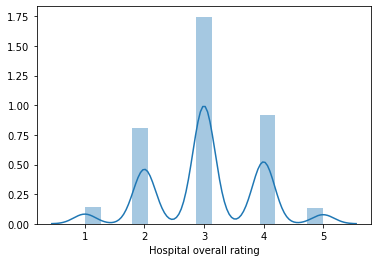

count    3061.000000
mean        3.024828
std         0.869624
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospital overall rating, dtype: float64

In [10]:
data["Hospital overall rating"] = data["Hospital overall rating"].astype(int)
sns.distplot(data["Hospital overall rating"])
plt.show()

data["Hospital overall rating"].describe()

### Average rating across all hospitals is 3.02 

### Does ownership of hospital matter?? 

In [11]:
data.groupby("Hospital Ownership").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating        \
                                                               mean count   
Hospital Ownership                                                          
Government - Federal                                       2.933333    15   
Government - Hospital District or Authority                2.961686   261   
Government - Local                                         2.791667   168   
Government - State                                         2.636364    44   
Physician                                                  4.096774    31   
Proprietary                                                2.905213   633   
Tribal                                                     2.500000     2   
Voluntary non-profit - Church                              3.145455   275   
Voluntary non-profit - Other                               3.112069   348   
Voluntary non-profit - Private                             3.066978  1284   

                                                              
                                            median       std  
Hospital Ownership                                            
Government - Federal                           3.0  0.883715  
Government - Hospital District or Authority    3.0  0.812444  
Government - Local                             3.0  0.867609  
Government - State                             3.0  1.036338  
Physician                                      4.0  1.044185  
Proprietary                                    3.0  0.880802  
Tribal                                         2.5  0.707107  
Voluntary non-profit - Church                  3.0  0.871658  
Voluntary non-profit - Other                   3.0  0.818780  
Voluntary non-profit - Private                 3.0  0.848749

### Observations
 #### Goverment owned hospitals have slightly lower ratings compared to Voluntary ones.
 #### Physician have higher ratings.
 #### There are just two tribal hospitals, could be dropped from analysis possibly.

### Mortality comparison 

In [12]:
data.groupby("Mortality national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                 mean count median       std
Mortality national comparison                                               
Above the National average                   3.290000   400      3  0.918154
Below the National average                   2.481050   343      2  0.775402
Not Available                                3.634021   194      4  0.946812
Same as the National average                 3.007062  2124      3  0.811160

### Safety of care

In [13]:
data.groupby("Safety of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                      mean count median   
Safety of care national comparison                                        
Above the National average                        3.437811   804      3   
Below the National average                        2.362556   673      2   
Not Available                                     3.121951   205      3   
Same as the National average                      3.092821  1379      3   

                                              
                                         std  
Safety of care national comparison            
Above the National average          0.836504  
Below the National average          0.814248  
Not Available                       0.678635  
Same as the National average        0.748544

### Readmission 

In [14]:
data.groupby("Readmission national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                   mean count median       std
Readmission national comparison                                               
Above the National average                     3.567636   791      4  0.737882
Below the National average                     2.375443   847      2  0.767706
Not Available                                  3.919355   124      4  0.950796
Same as the National average                   3.032333  1299      3  0.671132

### Patient Experience

In [15]:
data.groupby("Patient experience national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Patient experience national comparison                                        
Above the National average                            3.689966   887      4   
Below the National average                            2.416126  1079      2   
Not Available                                         2.858586    99      3   
Same as the National average                          3.108434   996      3   

                                                  
                                             std  
Patient experience national comparison            
Above the National average              0.715627  
Below the National average              0.746146  
Not Available                           0.606262  
Same as the National average            0.651469

### Effectiveness of care

In [16]:
data.groupby("Effectiveness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating        \
                                                             mean count   
Effectiveness of care national comparison                                 
Above the National average                               3.077699   991   
Below the National average                               2.716049   405   
Same as the National average                             3.068468  1665   

                                                            
                                          median       std  
Effectiveness of care national comparison                   
Above the National average                     3  0.872137  
Below the National average                     3  0.768091  
Same as the National average                   3  0.876439

### Timeliness of care

In [17]:
data.groupby("Timeliness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Timeliness of care national comparison                                        
Above the National average                            3.217918   826      3   
Below the National average                            2.618465   899      3   
Not Available                                         3.615894   151      4   
Same as the National average                          3.123207  1185      3   

                                                  
                                             std  
Timeliness of care national comparison            
Above the National average              0.707342  
Below the National average              0.897989  
Not Available                           1.063710  
Same as the National average            0.803293

### Efficient use of medical imaging

In [18]:
data.groupby("Efficient use of medical imaging national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating  \
                                                                      mean   
Efficient use of medical imaging national compa...                           
Above the National average                                        3.033426   
Below the National average                                        2.858824   
Not Available                                                     3.086331   
Same as the National average                                      3.035437   

                                                                           
                                                   count median       std  
Efficient use of medical imaging national compa...                         
Above the National average                           359      3  0.902509  
Below the National average                           340      3  0.822299  
Not Available                                        556      3  0.890244  
Same as the National average                        1806      3  0.862173

### Observations:
#### Difference between above and below is highest for timeliness(2.6 to 3.1)
#### All variables seem to have an impact on hospital rating
#### In many cases, when data for variable in not available, it has higher/lower than average rating.

In [19]:
Acute_care_Hospital_data= data[["Provider ID", "Hospital overall rating", "Hospital Type"]]
Acute_care_Hospital_data = Acute_care_Hospital_data.loc[Acute_care_Hospital_data["Hospital overall rating"] != "Not Available"]
Acute_care_Hospital_data = Acute_care_Hospital_data.loc[Acute_care_Hospital_data["Hospital Type"] == "Acute Care Hospitals"]
Acute_care_Hospital_data["Hospital overall rating"] = Acute_care_Hospital_data["Hospital overall rating"].astype(int)
Acute_care_Hospital_data.head()

C:\Users\Anindita\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Provider ID  Hospital overall rating         Hospital Type
0        10001                        3  Acute Care Hospitals
1        10005                        3  Acute Care Hospitals
2        10006                        2  Acute Care Hospitals
3        10007                        3  Acute Care Hospitals
4        10008                        3  Acute Care Hospitals

In [20]:
dataset=Acute_care_Hospital_data.groupby('Hospital Type')['Hospital overall rating'].value_counts()
dataset

Hospital Type         Hospital overall rating
Acute Care Hospitals  3                          1426
                      4                           749
                      2                           659
                      1                           117
                      5                           110
Name: Hospital overall rating, dtype: int64

There are several variables on which ratings depend, we need to analyse them.

### Mortality and readmissionns

In [21]:
df_mort_readm = pd.read_csv("Readmissions and Deaths - Hospital.csv")
df_mort_readm.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

Since this dataframe contains information on both mortality and readmissions, we break it into two separate dataframes.

In [22]:
#We observe that mortality measure IDs have the "MORT" keyword
#whereas readmission measure IDs have the "READM" keyword
#We'll use it to segregate the data
df_mort = df_mort_readm.loc[df_mort_readm["Measure ID"].str.contains("MORT")]
df_readm = df_mort_readm.loc[df_mort_readm["Measure ID"].str.contains("READM")]
print(df_mort.shape, df_readm.shape)

(28908, 18) (38544, 18)


In [23]:
print("Unique Measure for mortality", df_mort["Measure Name"].nunique())
df_mort["Measure Name"].unique()

Unique Measure for mortality 6


array(['Acute Myocardial Infarction (AMI) 30-Day Mortality Rate',
       'Death rate for CABG',
       'Death rate for chronic obstructive pulmonary disease (COPD) patients',
       'Heart failure (HF) 30-Day Mortality Rate',
       'Pneumonia (PN) 30-Day Mortality Rate',
       'Death rate for stroke patients'], dtype=object)

In [24]:
#Restructure data with only the measureID and the scores
df_mort = df_mort.pivot_table(index="Provider ID", columns=["Measure ID"],
                                     values=["Score"], aggfunc='last')
df_mort.columns = df_mort.columns.map("{0[1]}_{0[0]}".format)
df_mort.head()

MORT_30_AMI_Score MORT_30_CABG_Score MORT_30_COPD_Score  \
Provider ID                                                           
10001                    12.5                4.2                9.3   
10005                    16.0      Not Available                7.6   
10006                    16.7                4.1                7.1   
10007           Not Available      Not Available                9.3   
10008           Not Available      Not Available                8.2   

            MORT_30_HF_Score MORT_30_PN_Score MORT_30_STK_Score  
Provider ID                                                      
10001                   12.4             15.5              15.4  
10005                   15.5             20.8              15.5  
10006                   15.6             18.2              17.9  
10007                   14.4             18.8              16.6  
10008                   12.7             15.7     Not Available

In [25]:
# Check percent nulls in all measure scores
df_mort = df_mort.replace("Not Available", np.nan)
df_mort = df_mort.astype(float)
df_mort.isnull().mean()

MORT_30_AMI_Score     0.504359
MORT_30_CABG_Score    0.784558
MORT_30_COPD_Score    0.254670
MORT_30_HF_Score      0.249066
MORT_30_PN_Score      0.151515
MORT_30_STK_Score     0.444583
dtype: float64

There are lot of missing scores specially for CABG measure

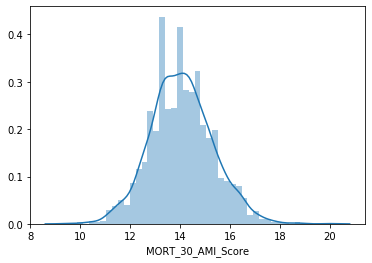

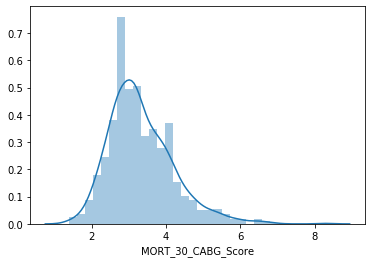

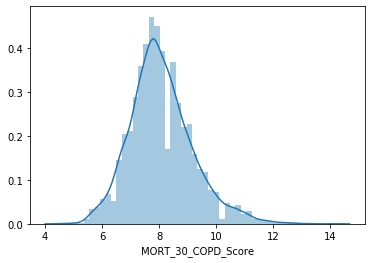

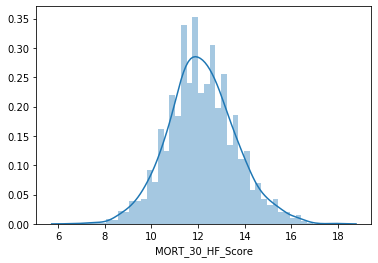

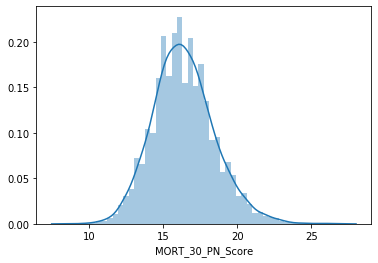

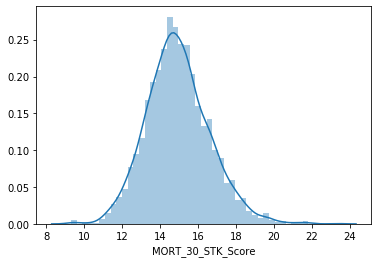

In [26]:
for col in df_mort.columns:
    sns.distplot(df_mort[col].dropna())
    plt.show()

In [27]:
mort_measures = df_mort.columns
# join with master data
df_mort= Acute_care_Hospital_data.join(df_mort, on= "Provider ID")
df_mort.head()

Provider ID  Hospital overall rating         Hospital Type  \
0        10001                        3  Acute Care Hospitals   
1        10005                        3  Acute Care Hospitals   
2        10006                        2  Acute Care Hospitals   
3        10007                        3  Acute Care Hospitals   
4        10008                        3  Acute Care Hospitals   

   MORT_30_AMI_Score  MORT_30_CABG_Score  MORT_30_COPD_Score  \
0               12.5                 4.2                 9.3   
1               16.0                 NaN                 7.6   
2               16.7                 4.1                 7.1   
3                NaN                 NaN                 9.3   
4                NaN                 NaN                 8.2   

   MORT_30_HF_Score  MORT_30_PN_Score  MORT_30_STK_Score  
0              12.4              15.5               15.4  
1              15.5              20.8               15.5  
2              15.6              18.2               17.9  
3              14.4              18.8               16.6  
4              12.7              15.7                NaN

We break the ratings into 3 groups: 
* group0:  ratings 1 and 2 - low
* group1: ratings 3 - average
* group2 : rating 4 and 5 - high

In [28]:
rating_group_map = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
df_mort["rating_group"] = df_mort["Hospital overall rating"].map(rating_group_map).astype(float)

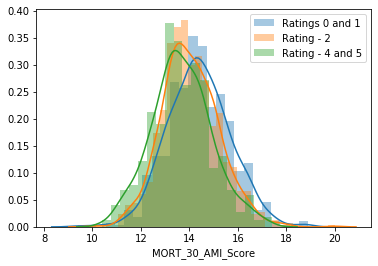

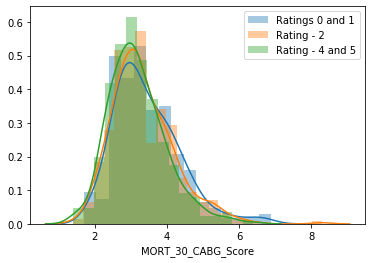

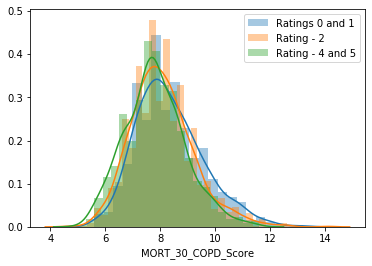

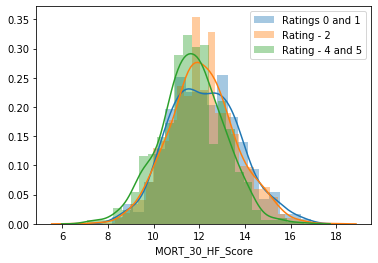

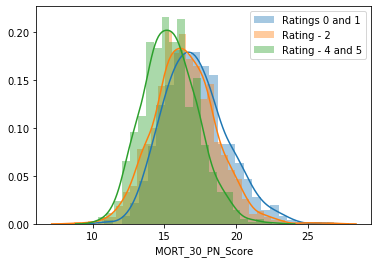

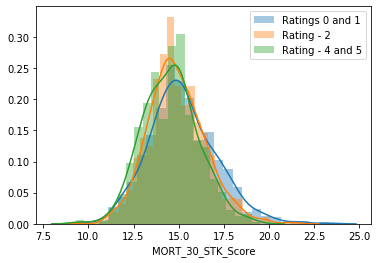

In [29]:
for measure in mort_measures:
    sns.distplot(df_mort.loc[df_mort["rating_group"] == 0, measure].dropna())
    sns.distplot(df_mort.loc[df_mort["rating_group"] == 1, measure].dropna())    
    sns.distplot(df_mort.loc[df_mort["rating_group"] == 2, measure].dropna())
    plt.legend(["Ratings 0 and 1", "Rating - 2", "Rating - 4 and 5"])
    plt.show()

#### Mort_30_PN and MORT_30_AMI are two most important measures as their distributions can easily be separated for different ratings.
#### All the measures are negatively corelated with rating, so we multiply them by -1 so that all measure translate to higher the better


In [30]:
measures = ['MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score']
df_mort[measures] = -1* df_mort[measures]

In [31]:
rating_group_map = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
Acute_care_Hospital_data["rating_group"] = Acute_care_Hospital_data["Hospital overall rating"].map(rating_group_map).astype(float)


def pivot_data(df, measure_col, score_col):
    df = df.loc[df[score_col] != "Not Available"]
    df = df.pivot_table(index="Provider ID", columns=[measure_col],
                                     values=[score_col], aggfunc='last')
    df.columns = df.columns.map("{0[1]}_{0[0]}".format)
    return df

def plot_distributions(df):
    for col in df.columns:
        sns.distplot(df[col].dropna())
        plt.show()

def plot_group_distributions(df, master_data):
    measure_cols = df.columns
    df = master_data.join(df, on="Provider ID")
    for measure in measure_cols:
        sns.distplot(df.loc[df["rating_group"] == 0, measure].dropna())
        sns.distplot(df.loc[df["rating_group"] == 1, measure].dropna())    
        sns.distplot(df.loc[df["rating_group"] == 2, measure].dropna())
        plt.legend(["Ratings 0 and 1", "Rating - 2", "Rating - 4 and 5"])
        plt.show()

In [32]:
df_readm = pivot_data(df_readm, measure_col="Measure ID", score_col="Score")
df_readm = df_readm.astype(float)

df_readm.head()

READM_30_AMI_Score  READM_30_CABG_Score  READM_30_COPD_Score  \
Provider ID                                                                 
10001                      16.5                 15.1                 21.1   
10005                      16.7                  NaN                 18.0   
10006                      16.1                 15.2                 19.8   
10007                       NaN                  NaN                 19.9   
10008                       NaN                  NaN                 19.2   

             READM_30_HF_Score  READM_30_HIP_KNEE_Score  \
Provider ID                                               
10001                     21.4                      5.1   
10005                     21.9                      5.7   
10006                     20.6                      5.0   
10007                     21.1                      NaN   
10008                     23.1                      NaN   

             READM_30_HOSP_WIDE_Score  READM_30_PN_Score  READM_30_STK_Score  
Provider ID                                                                   
10001                            15.4               18.7                12.7  
10005                            14.9               16.4                13.4  
10006                            15.4               17.9                12.0  
10007                            16.6               17.3                12.7  
10008                            15.7               16.0                 NaN

In [33]:
df_readm.isnull().mean()

READM_30_AMI_Score          0.510079
READM_30_CABG_Score         0.767384
READM_30_COPD_Score         0.173726
READM_30_HF_Score           0.173273
READM_30_HIP_KNEE_Score     0.381427
READM_30_HOSP_WIDE_Score    0.004530
READM_30_PN_Score           0.073839
READM_30_STK_Score          0.409287
dtype: float64

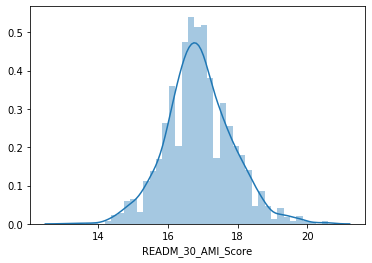

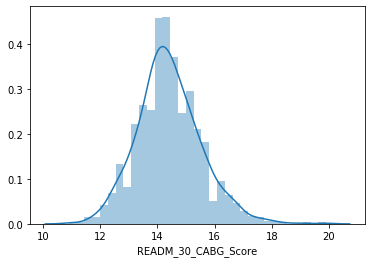

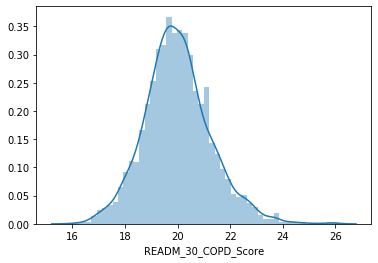

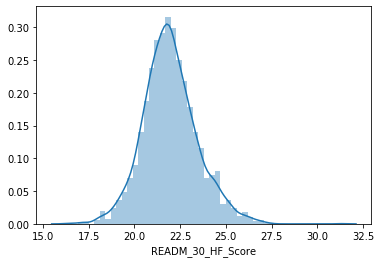

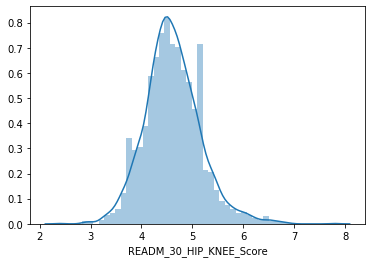

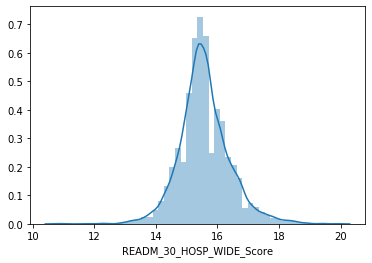

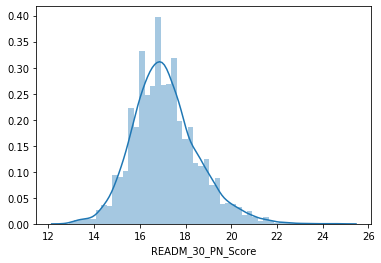

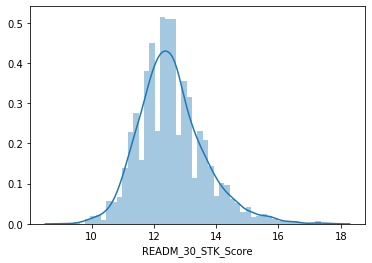

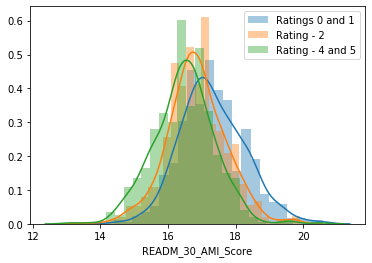

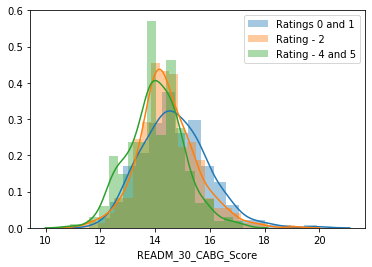

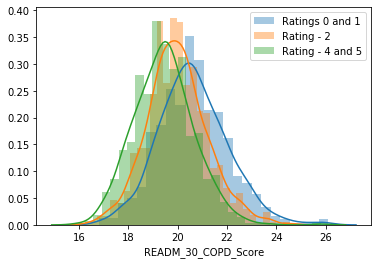

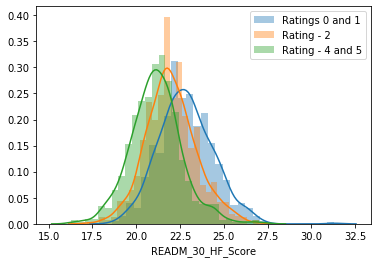

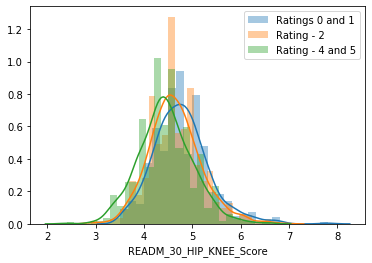

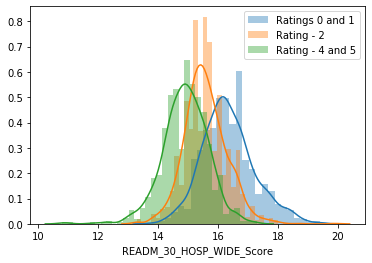

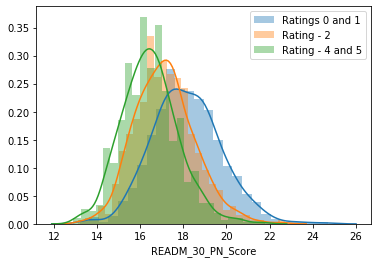

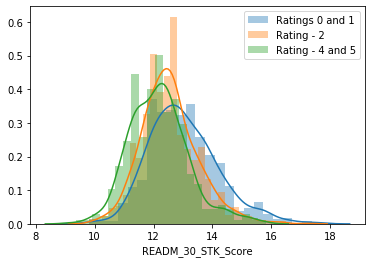

In [34]:
plot_distributions(df_readm)
plot_group_distributions(df_readm, Acute_care_Hospital_data)

#### Observations:¶
##### Most of the measures in readmissions clearly separate different rating groups and are important features
##### All measures on readmissions are again negatively corelated so we invert them
##### WIDE, PN and HF are most important measures

In [35]:
df_readm  = -1*df_readm
df_readm.head()

READM_30_AMI_Score  READM_30_CABG_Score  READM_30_COPD_Score  \
Provider ID                                                                 
10001                     -16.5                -15.1                -21.1   
10005                     -16.7                  NaN                -18.0   
10006                     -16.1                -15.2                -19.8   
10007                       NaN                  NaN                -19.9   
10008                       NaN                  NaN                -19.2   

             READM_30_HF_Score  READM_30_HIP_KNEE_Score  \
Provider ID                                               
10001                    -21.4                     -5.1   
10005                    -21.9                     -5.7   
10006                    -20.6                     -5.0   
10007                    -21.1                      NaN   
10008                    -23.1                      NaN   

             READM_30_HOSP_WIDE_Score  READM_30_PN_Score  READM_30_STK_Score  
Provider ID                                                                   
10001                           -15.4              -18.7               -12.7  
10005                           -14.9              -16.4               -13.4  
10006                           -15.4              -17.9               -12.0  
10007                           -16.6              -17.3               -12.7  
10008                           -15.7              -16.0                 NaN

### Timeliness and Effectiveness¶
This has measures related to both timeliness and effectivess of care. SO we need to seprate them out

In [36]:
df_time_eff = pd.read_csv("Timely and Effective Care - Hospital.csv")
df_time_eff.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                    Condition Measure ID  \
0  Heart Attack or Chest Pain     AMI_7a   
1  Heart Attack or Chest Pain     AMI_8a   
2           Children's Asthma      CAC_3   
3        Emergency Department      ED_1b   
4        Emergency Department      ED_2b   

                                        Measure Name          Score  \
0  Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
1  Primary PCI Received Within 90 Minutes of Hosp...             92   
2              Home Management Plan of Care Document  Not Available   
3                                                ED1            269   
4                                                ED2             68   

          Sample                                           Footnote  \
0  Not Available    7 - No cases met the criteria for this measure.   
1             24  3 - Results are based on a shorter time period...   
2  Not Available  5 - Results are not available for this reporti...   
3            535  2 - Data submitted were based on a sample of c...   
4            535  2 - Data submitted were based on a sample of c...   

  Measure Start Date Measure End Date  
0         01/01/2015       12/31/2015  
1         01/01/2015       09/30/2015  
2         01/01/2015       12/31/2015  
3         01/01/2015       12/31/2015  
4         01/01/2015       12/31/2015

In [37]:
print("Unique Measure Name", df_time_eff["Measure Name"].nunique())
df_time_eff["Measure Name"].unique()

Unique Measure Name 43


array(['Fibrinolytic Therapy Received Within 30 Minutes Of Hospital Arrival',
       'Primary PCI Received Within 90 Minutes of Hospital Arrival',
       'Home Management Plan of Care Document', 'ED1', 'ED2',
       'Emergency department volume', 'Evaluation of LVS Function',
       'Immunization for influenza',
       'Healthcare workers given influenza vaccination',
       'Median Time to Fibrinolysis', 'OP 18',
       'Fibrinolytic Therapy Received Within 30 Minutes of ED Arrival',
       'Door to diagnostic eval', 'Median time to pain med',
       'Left before being seen', 'Head CT results',
       'Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients',
       'Endoscopy/polyp surveillance: colonoscopy interval for patients with a history of adenomatous polyps - avoidance of inappropriate use',
       'Median Time to Transfer to Another Facility for Acute Coronary Intervention',
       'Aspirin at Arrival', 'Median Time to ECG

Check unique measures for timeliness.

In [38]:
# Manually looking at all measures and breaking them into timeliness and effectiveness
time_measures = ['Fibrinolytic Therapy Received Within 30 Minutes Of Hospital Arrival',
 'Fibrinolytic Therapy Received Within 30 Minutes of ED Arrival',
 'Median Time to ECG',
 'Median Time to Fibrinolysis',
 'Median Time to Transfer to Another Facility for Acute Coronary Intervention',
 'Median time to pain med', 
 'Primary PCI Received Within 90 Minutes of Hospital Arrival',
 'Prophylactic antibiotic received within 1 hour prior to surgical incision',
 'Prophylactic antibiotics discontinued within 24 hours after surgery end time',
 'Surgery Patients Who Received Appropriate Venous Thromboembolism Prophylaxis Within 24 Hours Prior to Surgery to 24 Hours After Surgery',
]

effective_measures = ['Anticoagulation Therapy for Atrial Fibrillation/Flutter',
 'Anticoagulation overlap therapy',
 'Antithrombotic Therapy by End of Hospital Day 2',
 'Aspirin at Arrival',
 'Assessed for Rehabilitation',
 'Discharged on Antithrombotic Therapy',
 'Discharged on Statin Medication',
 'Door to diagnostic eval',
 'ED1',
 'ED2',
 'Emergency department volume',
 'Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients',
 'Endoscopy/polyp surveillance: colonoscopy interval for patients with a history of adenomatous polyps - avoidance of inappropriate use',
 'Evaluation of LVS Function',
 'Healthcare workers given influenza vaccination',
 'Home Management Plan of Care Document',
 'Hospital acquired potentially preventable venous thromboembolism',
 'ICU venous thromboembolism prophylaxis',
 'Immunization for influenza',
 'Initial antibiotic selection for CAP in immunocompetent patient',
 'Left before being seen',
 'Prophylactic Antibiotic Selection for Surgical Patients',
 'OP 18',
 'Percent of newborns whose deliveries were scheduled early (1-3 weeks early), when a scheduled delivery was not medically necessary',
 'Postoperative Urinary Catheter Removal',
 'Surgery Patients on a Beta Blocker Prior to Arrival Who Received a Beta Blocker During the Perioperative Period',
 'Thrombolytic Therapy',
 'Unfractionated heparin with dosages/platelet count monitoring',
 'Venous Thromboembolism (VTE) Prophylaxis',
 'Venous thromboembolism prophylaxis',
 'Warfarin therapy discharge instructions'
 ]

In [39]:
print("Measures for timeliness", len(time_measures))
print("Measures for effectiveness", len(effective_measures))

Measures for timeliness 10
Measures for effectiveness 31


### Effectiveness of care

In [40]:
df_eff = df_time_eff.loc[df_time_eff["Measure Name"].isin(effective_measures)]

In [41]:
df_eff.loc[df_eff["Measure ID"] == "EDV", "Score"].value_counts()

Not Available                                 1535
Low (0 - 19,999 patients annually)            1072
Medium (20,000 - 39,999 patients annually)     978
Very High (60,000+ patients annually)          642
High (40,000 - 59,999 patients annually)       591
Name: Score, dtype: int64

In [42]:
label2num = {
    "Not Available": np.nan,
    "Low (0 - 19,999 patients annually)": 0,
    "Medium (20,000 - 39,999 patients annually)": 1,
    "High (40,000 - 59,999 patients annually)": 2,
    "Very High (60,000+ patients annually)": 3
}

In [43]:
df_eff = pivot_data(df_eff, measure_col="Measure ID", score_col="Score")
df_eff["EDV_Score"] = df_eff["EDV_Score"].map(label2num)
df_eff = df_eff.astype(float)
df_eff.columns = df_eff.columns.map("EFF_{0}".format)
df_eff.head()

EFF_CAC_3_Score  EFF_EDV_Score  EFF_ED_1b_Score  EFF_ED_2b_Score  \
Provider ID                                                                     
10001                    NaN            2.0            269.0             68.0   
10005                    NaN            3.0            243.0             71.0   
10006                    NaN            2.0            217.0             78.0   
10007                    NaN            0.0            219.0             68.0   
10008                    NaN            0.0            180.0             56.0   

             EFF_HF_2_Score  EFF_IMM_2_Score  \
Provider ID                                    
10001                 100.0             97.0   
10005                  97.0             99.0   
10006                   NaN            100.0   
10007                  97.0             99.0   
10008                 100.0             95.0   

             EFF_IMM_3_OP_27_FAC_ADHPCT_Score  EFF_OP_18b_Score  \
Provider ID                                                       
10001                                    81.0             196.0   
10005                                    83.0             117.0   
10006                                    87.0             133.0   
10007                                    53.0             119.0   
10008                                    43.0              98.0   

             EFF_OP_20_Score  EFF_OP_22_Score  EFF_OP_29_Score  \
Provider ID                                                      
10001                   65.0              4.0              NaN   
10005                   27.0              2.0             92.0   
10006                   10.0              1.0             70.0   
10007                   38.0              1.0              0.0   
10008                   27.0              1.0             96.0   

             EFF_OP_30_Score  EFF_OP_4_Score  EFF_PC_01_Score  EFF_PN_6_Score  \
Provider ID                                                                     
10001                   82.0             NaN              0.0            98.0   
10005                   92.0            99.0              1.0            98.0   
10006                   88.0             NaN              0.0             NaN   
10007                    0.0            89.0              NaN            84.0   
10008                   97.0             NaN              NaN            94.0   

             EFF_SCIP_CARD_2_Score  EFF_SCIP_INF_2_Score  \
Provider ID                                                
10001                         98.0                 100.0   
10005                        100.0                  99.0   
10006                          NaN                   NaN   
10007                         80.0                 100.0   
10008                          NaN                   NaN   

             EFF_SCIP_INF_9_Score  EFF_STK_1_Score  EFF_STK_10_Score  \
Provider ID                                                            
10001                        96.0             99.0              96.0   
10005                       100.0             98.0              99.0   
10006                         NaN             99.0             100.0   
10007                        85.0             80.0              85.0   
10008                         NaN              NaN               NaN   

             EFF_STK_2_Score  EFF_STK_3_Score  EFF_STK_4_Score  \
Provider ID                                                      
10001                  100.0              NaN             67.0   
10005                  100.0            100.0              NaN   
10006                  100.0             94.0              NaN   
10007                  100.0              NaN              NaN   
10008                    NaN              NaN              NaN   

             EFF_STK_5_Score  EFF_STK_6_Score  EFF_VTE_1_Score  \
Provider ID                                                      
10001                   98.0             99.0             97.0   
10005               

In [44]:
df_eff.isnull().mean()

EFF_CAC_3_Score                     0.960789
EFF_EDV_Score                       0.264396
EFF_ED_1b_Score                     0.194264
EFF_ED_2b_Score                     0.197849
EFF_HF_2_Score                      0.855927
EFF_IMM_2_Score                     0.152140
EFF_IMM_3_OP_27_FAC_ADHPCT_Score    0.079767
EFF_OP_18b_Score                    0.196953
EFF_OP_20_Score                     0.194488
EFF_OP_22_Score                     0.266189
EFF_OP_29_Score                     0.388080
EFF_OP_30_Score                     0.411382
EFF_OP_4_Score                      0.502801
EFF_PC_01_Score                     0.434909
EFF_PN_6_Score                      0.825454
EFF_SCIP_CARD_2_Score               0.910374
EFF_SCIP_INF_2_Score                0.876989
EFF_SCIP_INF_9_Score                0.890881
EFF_STK_1_Score                     0.399507
EFF_STK_10_Score                    0.651132
EFF_STK_2_Score                     0.656957
EFF_STK_3_Score                     0.812906
EFF_STK_4_

We can drop columns having 80% null values.

In [45]:
imp_measures = df_eff.columns[df_eff.isnull().mean() < 0.80]
print("Measure with less than 80% missing data are", len(imp_measures))
df_eff = df_eff[imp_measures]

Measure with less than 80% missing data are 23


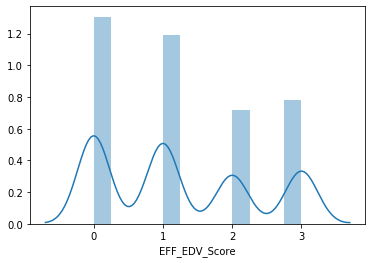

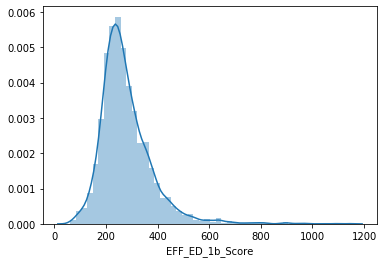

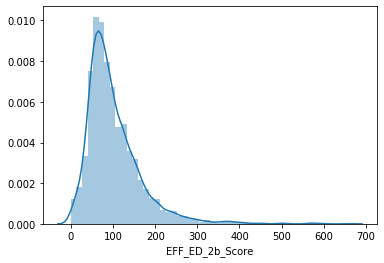

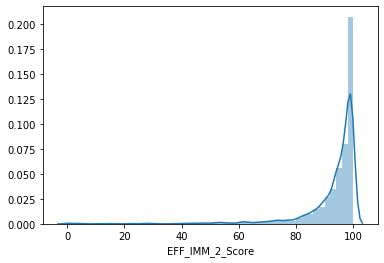

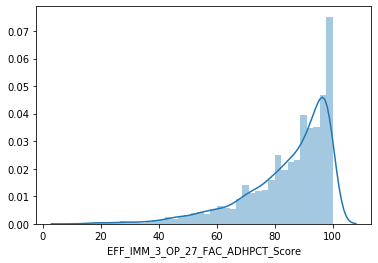

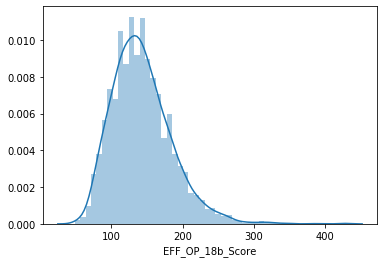

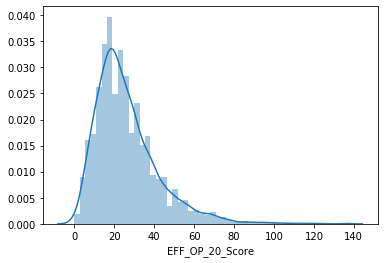

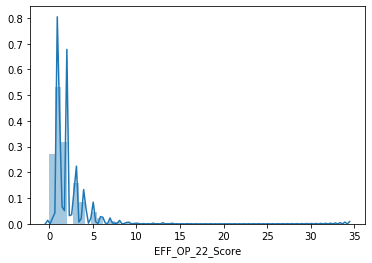

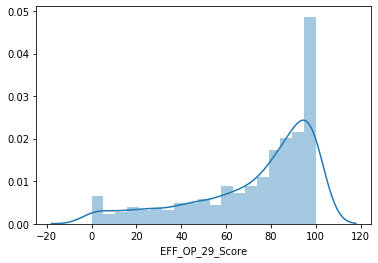

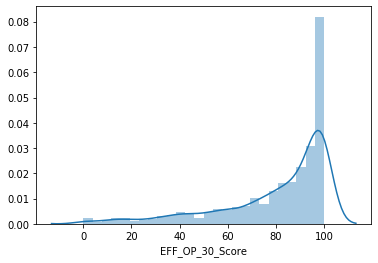

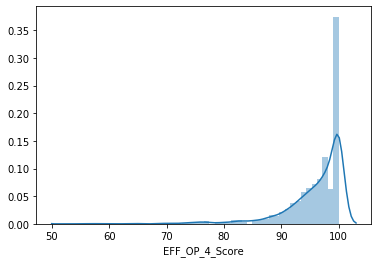

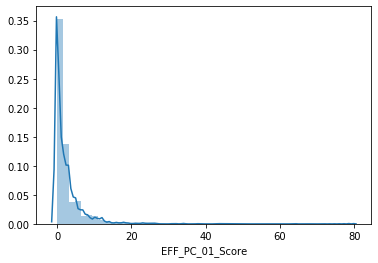

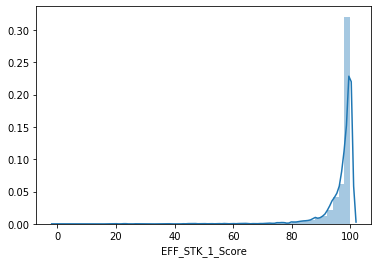

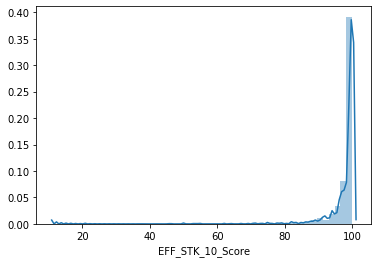

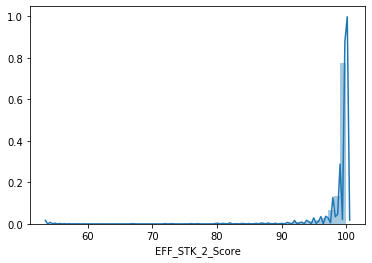

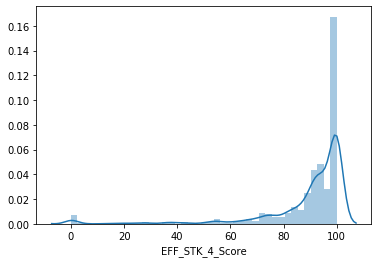

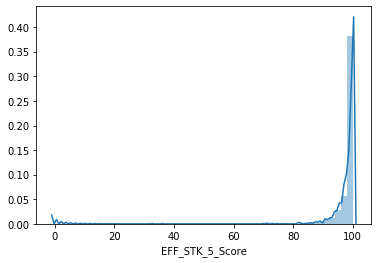

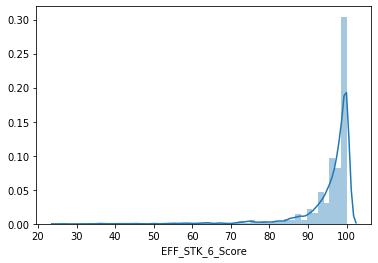

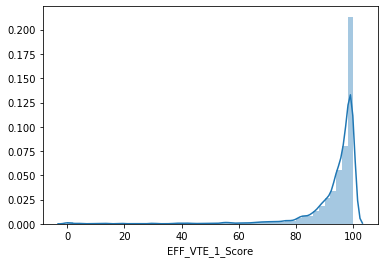

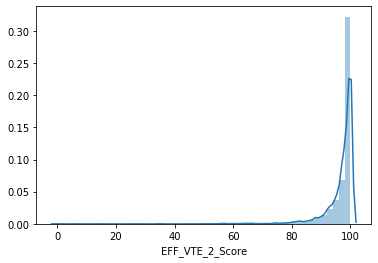

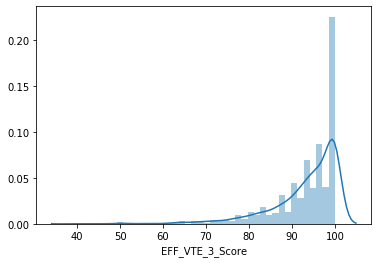

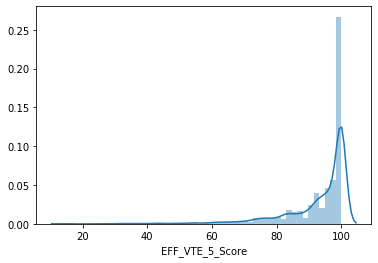

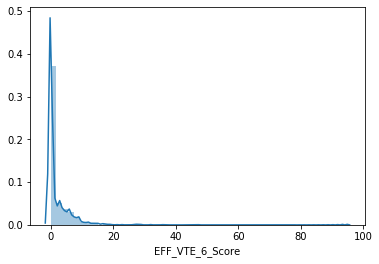

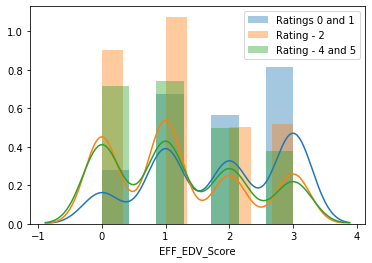

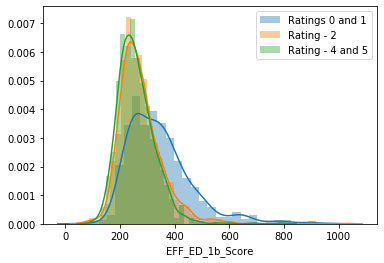

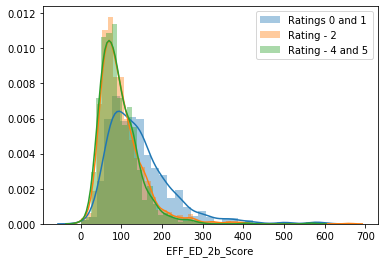

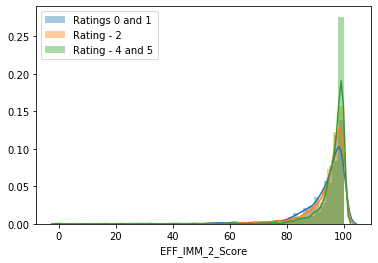

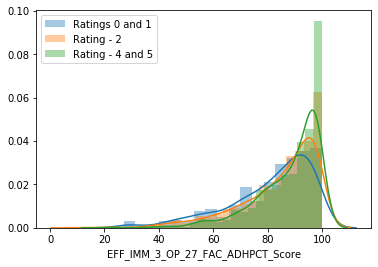

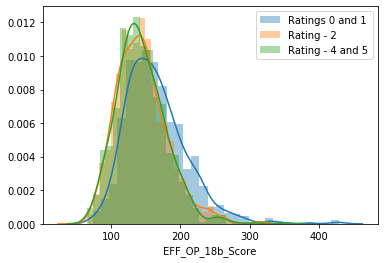

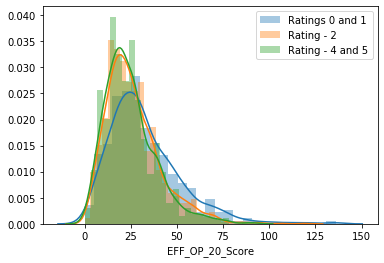

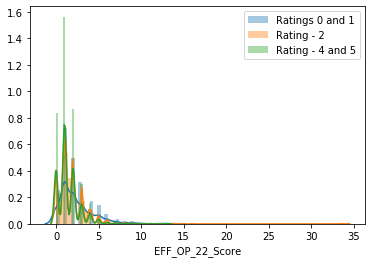

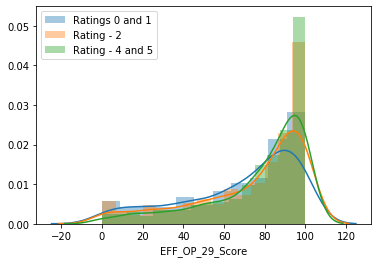

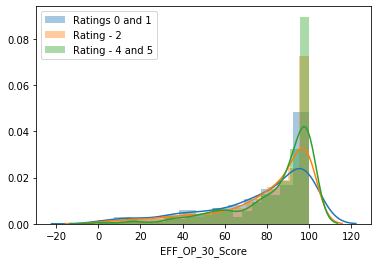

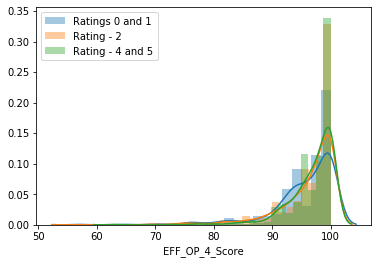

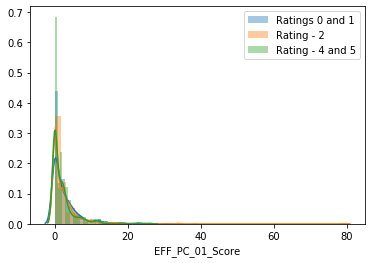

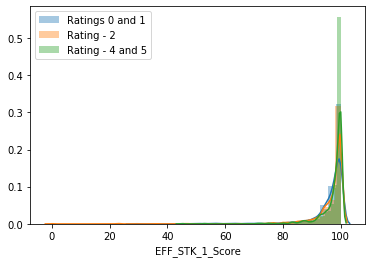

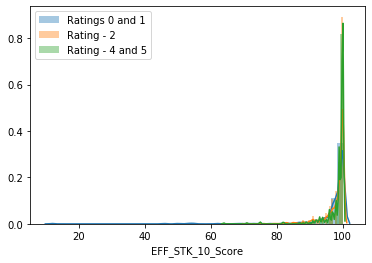

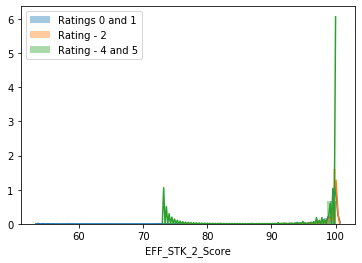

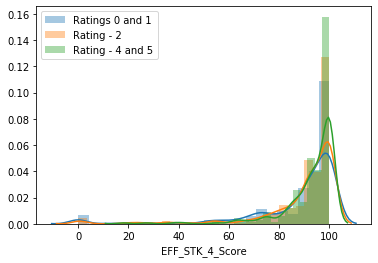

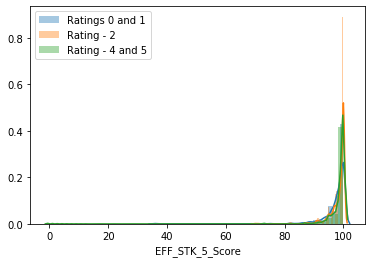

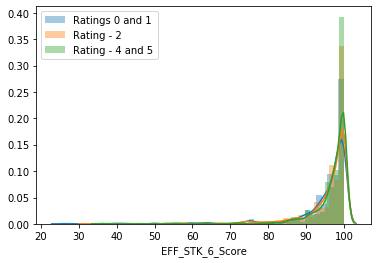

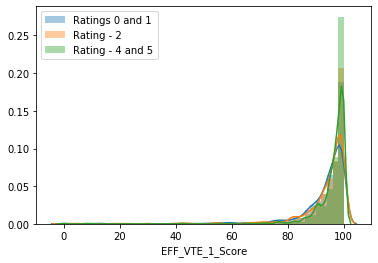

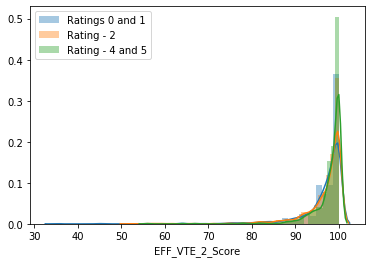

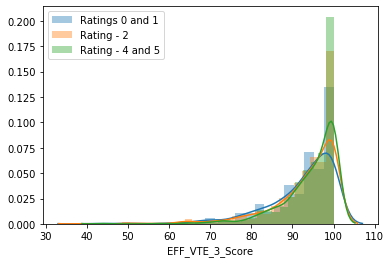

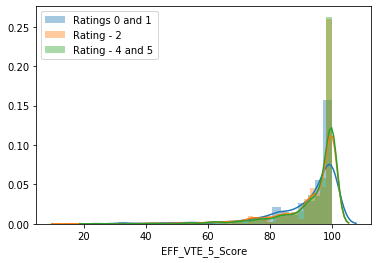

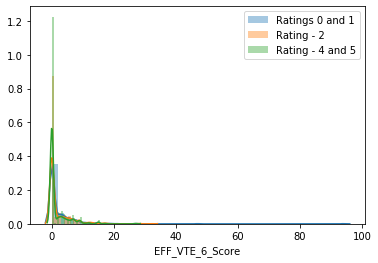

In [46]:

plot_distributions(df_eff)
plot_group_distributions(df_eff, Acute_care_Hospital_data)

Only EB_1b, OP_20 and OP_21 have strong impact on rating, most of the other features related timeliness have very impact on overall ratings.

In [47]:
for m in ['EDV', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_22', 'PC_01', 'VTE_6']:
    col = "EFF_{}_Score".format(m)
    df_eff[col] = -1*df_eff[col]

In [48]:
df_time = df_time_eff.loc[df_time_eff["Measure Name"].isin(time_measures)]
df_time.head()

Provider ID                     Hospital Name                 Address  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
9         10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
11        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
13        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

      City State  ZIP Code County Name  Phone Number  \
0   DOTHAN    AL     36301     HOUSTON    3347938701   
1   DOTHAN    AL     36301     HOUSTON    3347938701   
9   DOTHAN    AL     36301     HOUSTON    3347938701   
11  DOTHAN    AL     36301     HOUSTON    3347938701   
13  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Condition Measure ID  \
0   Heart Attack or Chest Pain     AMI_7a   
1   Heart Attack or Chest Pain     AMI_8a   
9   Heart Attack or Chest Pain       OP_1   
11  Heart Attack or Chest Pain       OP_2   
13        Emergency Department      OP_21   

                                         Measure Name          Score  \
0   Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
1   Primary PCI Received Within 90 Minutes of Hosp...             92   
9                         Median Time to Fibrinolysis  Not Available   
11  Fibrinolytic Therapy Received Within 30 Minute...  Not Available   
13                            Median time to pain med             99   

           Sample                                           Footnote  \
0   Not Available    7 - No cases met the criteria for this measure.   
1              24  3 - Results are based on a shorter time period...   
9   Not Available  3 - Results are based on a shorter time period...   
11  Not Available  3 - Results are based on a shorter time period...   
13            111                                                NaN   

   Measure Start Date Measure End Date  
0          01/01/2015       12/31/2015  
1          01/01/2015       09/30/2015  
9          01/01/2015       12/31/2015  
11         01/01/2015       12/31/2015  
13         01/01/2015       12/31/2015

In [49]:
df_time = pivot_data(df_time, measure_col="Measure ID", score_col="Score")
df_time = df_time.astype(float)
df_time.columns = df_time.columns.map("TIME_{0}".format)
df_time.head()

TIME_AMI_7a_Score  TIME_AMI_8a_Score  TIME_OP_1_Score  \
Provider ID                                                          
10001                      NaN               92.0              NaN   
10005                      NaN                NaN              NaN   
10006                      NaN                NaN              NaN   
10007                      NaN                NaN              NaN   
10008                      NaN                NaN              NaN   

             TIME_OP_2_Score  TIME_OP_21_Score  TIME_OP_3b_Score  \
Provider ID                                                        
10001                    NaN              99.0               NaN   
10005                    NaN              60.0               NaN   
10006                    NaN              58.0               NaN   
10007                    NaN              90.0               NaN   
10008                    NaN              49.0               NaN   

             TIME_OP_5_Score  TIME_SCIP_INF_1_Score  TIME_SCIP_INF_3_Score  \
Provider ID                                                                  
10001                    NaN                  100.0                   99.0   
10005                   12.0                  100.0                  100.0   
10006                    NaN                    NaN                    NaN   
10007                    7.0                  100.0                   94.0   
10008                    NaN                    NaN                    NaN   

             TIME_SCIP_VTE_2_Score  
Provider ID                         
10001                        100.0  
10005                        100.0  
10006                          NaN  
10007                        100.0  
10008                          NaN

In [50]:
df_time.isnull().mean()

TIME_AMI_7a_Score        0.999727
TIME_AMI_8a_Score        0.959530
TIME_OP_1_Score          0.978398
TIME_OP_2_Score          0.978398
TIME_OP_21_Score         0.094066
TIME_OP_3b_Score         0.892535
TIME_OP_5_Score          0.386382
TIME_SCIP_INF_1_Score    0.846049
TIME_SCIP_INF_3_Score    0.851518
TIME_SCIP_VTE_2_Score    0.850971
dtype: float64

In [51]:

imp_measures = df_time.columns[df_time.isnull().mean() < 0.80]
print("Measure with less than 80% missing data are", len(imp_measures))
df_time = df_time[imp_measures]

Measure with less than 80% missing data are 2


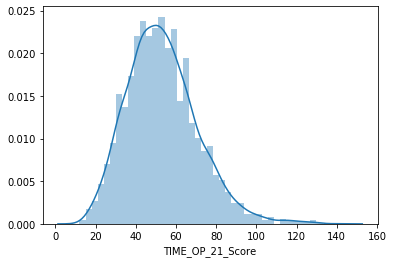

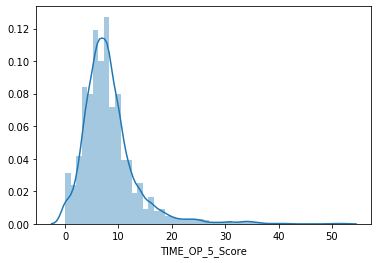

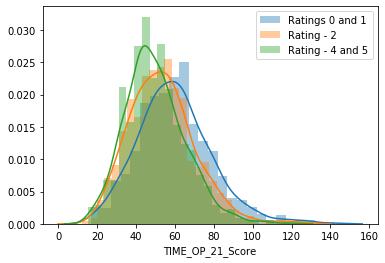

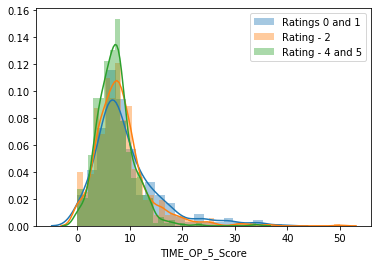

In [52]:
plot_distributions(df_time)
plot_group_distributions(df_time, Acute_care_Hospital_data)

##### Both are good indicators
##### Need to invert both

In [53]:
df_time = -1*df_time

### Patient Experience

In [54]:
df_exp = pd.read_csv("HCAHPS - Hospital.csv", encoding="latin-1")
df_exp.drop(["Address", "City", "State", "ZIP Code", "County Name"], axis=1, inplace=True)
df_exp.head(10)

Provider ID                     Hospital Name  Phone Number  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
5        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
6        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
7        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
8        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   
9        10001  SOUTHEAST ALABAMA MEDICAL CENTER    3347938701   

       HCAHPS Measure ID                                    HCAHPS Question  \
0          H_STAR_RATING                                Summary star rating   
1        H_CLEAN_HSP_A_P  Patients who reported that their room and bath...   
2       H_CLEAN_HSP_SN_P  Patients who reported that their room and bath...   
3        H_CLEAN_HSP_U_P  Patients who reported that their room and bath...   
4   H_CLEAN_LINEAR_SCORE                    Cleanliness - linear mean score   
5    H_CLEAN_STAR_RATING                          Cleanliness - star rating   
6           H_COMP_1_A_P  Patients who reported that their nurses "Alway...   
7  H_COMP_1_LINEAR_SCORE            Nurse communication - linear mean score   
8          H_COMP_1_SN_P  Patients who reported that their nurses "Somet...   
9   H_COMP_1_STAR_RATING                  Nurse communication - star rating   

                         HCAHPS Answer Description Patient Survey Star Rating  \
0                              Summary star rating                          3   
1                          Room was "always" clean             Not Applicable   
2            Room was "sometimes" or "never" clean             Not Applicable   
3                         Room was "usually" clean             Not Applicable   
4                  Cleanliness - linear mean score             Not Applicable   
5                        Cleanliness - star rating                          2   
6                Nurses "always" communicated well             Not Applicable   
7          Nurse communication - linear mean score             Not Applicable   
8  Nurses "sometimes" or "never" communicated well             Not Applicable   
9                Nurse communication - star rating                          3   

  Patient Survey Star Rating Footnote HCAHPS Answer Percent  \
0                                 NaN        Not Applicable   
1                                 NaN                    66   
2                                 NaN                    12   
3                                 NaN                    22   
4                                 NaN        Not Applicable   
5                                 NaN        Not Applicable   
6                                 NaN                    76   
7                                 NaN        Not Applicable   
8                                 NaN                     6   
9                                 NaN        Not Applicable   

  HCAHPS Answer Percent Footnote HCAHPS Linear Mean Value  \
0                            NaN           Not Applicable   
1                            NaN           Not Applicable   
2                            NaN           Not Applicable   
3                            NaN           Not Applicable   
4                            NaN                       84   
5                            NaN           Not Applicable   
6                            NaN           Not Applicable   
7                            NaN                       90   
8                            NaN           Not Applicable   
9                            NaN           Not Applicable   

  Number of Completed Surveys Number of Completed Surveys Footnote  \
0                        1194                                  NaN   
1       

The hospital experience file has different format compared to other files. Also, the scores are distributed across 3 columns. For Star Rating scores is in Patient Survey Star Rating. Cleanliness scores are in Answer Description. Linear value related scores are in HCAHPS Linear Mean Value

### We will start by only taking Star Ratings

In [55]:
df_exp["Measure ID"] = df_exp["HCAHPS Measure ID"].copy()
df_exp["Score"] = df_exp["Patient Survey Star Rating"].copy()
df_exp = df_exp.loc[df_exp["HCAHPS Measure ID"].str.contains("STAR_RATING")]

In [56]:
print("No. of unique measures", df_exp["Measure ID"].nunique())
df_exp["HCAHPS Question"].unique()

No. of unique measures 12


array(['Summary star rating', 'Cleanliness - star rating',
       'Nurse communication - star rating',
       'Doctor communication - star rating',
       'Staff responsiveness - star rating',
       'Pain management - star rating',
       'Communication about medicines - star rating',
       'Discharge information - star rating',
       'Care transition - star rating',
       'Overall hospital rating - star rating', 'Quietness - star rating',
       'Recommend hospital - star rating'], dtype=object)

In [57]:

df_exp = pivot_data(df_exp, measure_col="Measure ID", score_col="Score")
df_exp.columns = df_exp.columns.map("EXP_{0}".format)
df_exp = df_exp.astype(float)
df_exp.head()

EXP_H_CLEAN_STAR_RATING_Score  EXP_H_COMP_1_STAR_RATING_Score  \
Provider ID                                                                  
10001                                  2.0                             3.0   
10005                                  2.0                             3.0   
10006                                  2.0                             3.0   
10007                                  3.0                             3.0   
10011                                  1.0                             3.0   

             EXP_H_COMP_2_STAR_RATING_Score  EXP_H_COMP_3_STAR_RATING_Score  \
Provider ID                                                                   
10001                                   3.0                             2.0   
10005                                   4.0                             3.0   
10006                                   4.0                             3.0   
10007                                   5.0                             4.0   
10011                                   3.0                             2.0   

             EXP_H_COMP_4_STAR_RATING_Score  EXP_H_COMP_5_STAR_RATING_Score  \
Provider ID                                                                   
10001                                   3.0                             3.0   
10005                                   3.0                             3.0   
10006                                   3.0                             3.0   
10007                                   4.0                             4.0   
10011                                   3.0                             2.0   

             EXP_H_COMP_6_STAR_RATING_Score  EXP_H_COMP_7_STAR_RATING_Score  \
Provider ID                                                                   
10001                                   3.0                             3.0   
10005                                   4.0                             2.0   
10006                                   2.0                             2.0   
10007                                   3.0                             3.0   
10011                                   3.0                             2.0   

             EXP_H_HSP_RATING_STAR_RATING_Score  \
Provider ID                                       
10001                                       4.0   
10005                                       4.0   
10006                                       2.0   
10007                                       3.0   
10011                                       3.0   

             EXP_H_QUIET_STAR_RATING_Score  EXP_H_RECMND_STAR_RATING_Score  \
Provider ID                                                                  
10001                                  4.0                             4.0   
10005                                  4.0                             3.0   
10006                                  4.0                             2.0   
10007                                  5.0                             3.0   
10011                                  3.0                             3.0   

             EXP_H_STAR_RATING_Score  
Provider ID                           
10001                            3.0  
10005                            3.0  
10006                            3.0  
10007                            4.0  
10011                            3.0

In [58]:
df_exp.isnull().mean()

EXP_H_CLEAN_STAR_RATING_Score         0.0
EXP_H_COMP_1_STAR_RATING_Score        0.0
EXP_H_COMP_2_STAR_RATING_Score        0.0
EXP_H_COMP_3_STAR_RATING_Score        0.0
EXP_H_COMP_4_STAR_RATING_Score        0.0
EXP_H_COMP_5_STAR_RATING_Score        0.0
EXP_H_COMP_6_STAR_RATING_Score        0.0
EXP_H_COMP_7_STAR_RATING_Score        0.0
EXP_H_HSP_RATING_STAR_RATING_Score    0.0
EXP_H_QUIET_STAR_RATING_Score         0.0
EXP_H_RECMND_STAR_RATING_Score        0.0
EXP_H_STAR_RATING_Score               0.0
dtype: float64

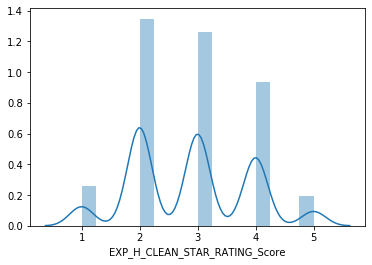

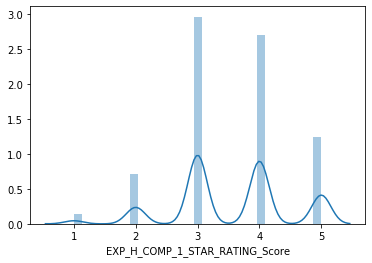

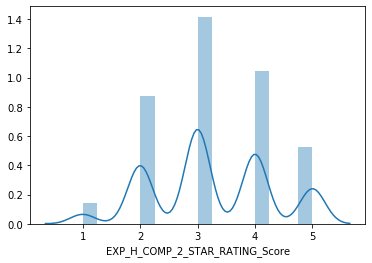

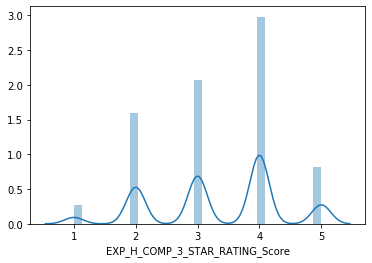

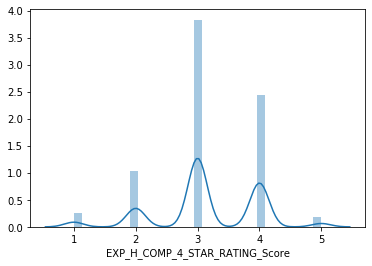

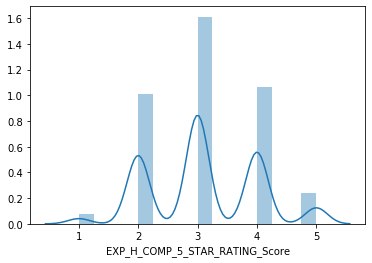

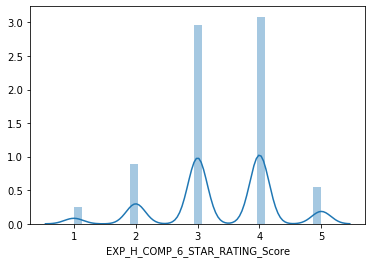

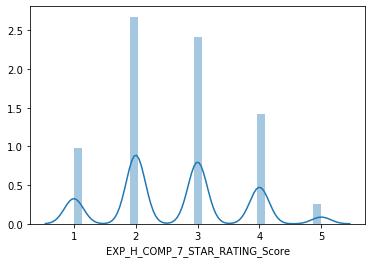

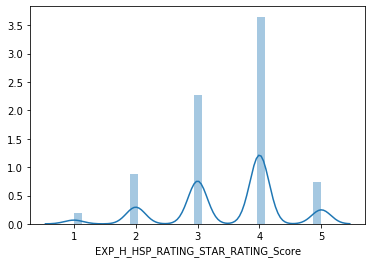

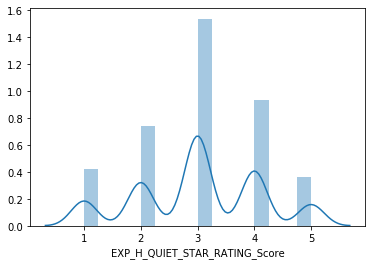

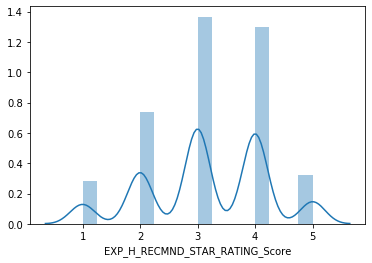

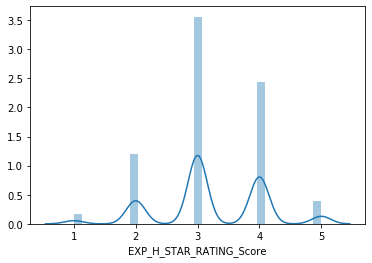

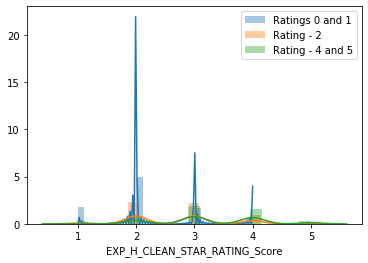

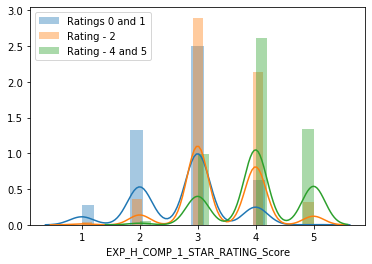

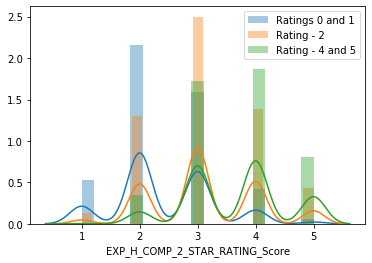

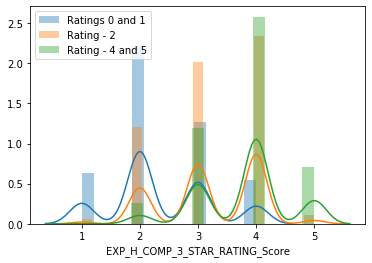

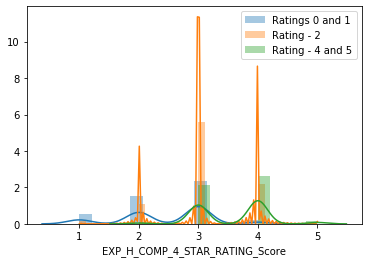

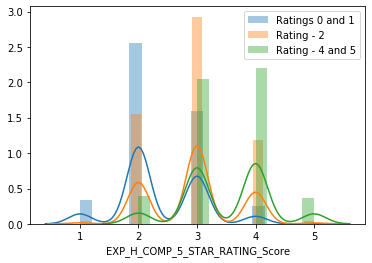

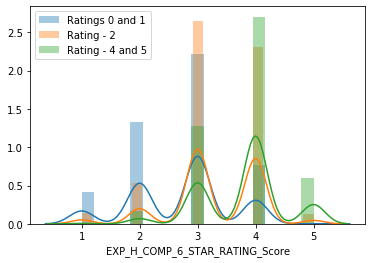

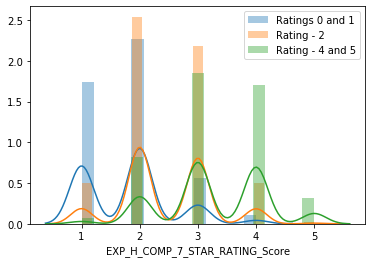

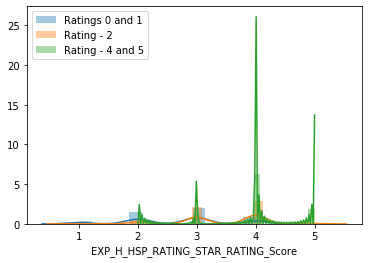

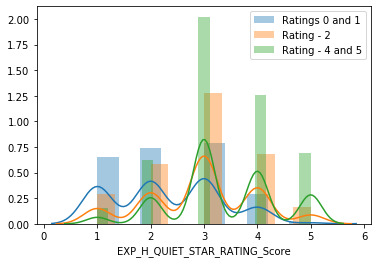

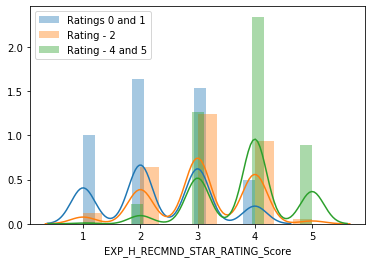

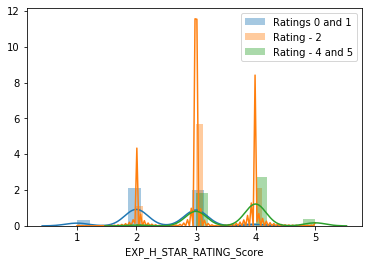

In [59]:
plot_distributions(df_exp)
plot_group_distributions(df_exp, Acute_care_Hospital_data)

#### All star ratings seem to have good corelation with overall ratings

### Medical Imaging

In [60]:
df_med = pd.read_csv("Outpatient Imaging Efficiency - Hospital.csv")
df_med.head(5)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701      OP_10   
1  DOTHAN    AL     36301     HOUSTON    3347938701      OP_11   
2  DOTHAN    AL     36301     HOUSTON    3347938701      OP_13   
3  DOTHAN    AL     36301     HOUSTON    3347938701      OP_14   
4  DOTHAN    AL     36301     HOUSTON    3347938701       OP_8   

                                        Measure Name Score Footnote  \
0                Abdomen CT Use of Contrast Material   6.4      NaN   
1                 Thorax CT Use of Contrast Material   0.9      NaN   
2  Outpatients who got cardiac imaging stress tes...   7.1      NaN   
3  Outpatients with brain CT scans who got a sinu...   2.4      NaN   
4                 MRI Lumbar Spine for Low Back Pain  38.1      NaN   

  Measure Start Date Measure End Date  
0         07/01/2014       06/30/2015  
1         07/01/2014       06/30/2015  
2         07/01/2014       06/30/2015  
3         07/01/2014       06/30/2015  
4         07/01/2014       06/30/2015

In [61]:
print("No. of unique measures", df_med["Measure ID"].nunique())
df_med["Measure Name"].unique()

No. of unique measures 6


array(['Abdomen CT Use of Contrast Material',
       'Thorax CT Use of Contrast Material',
       'Outpatients who got cardiac imaging stress tests before low-risk outpatient surgery',
       'Outpatients with brain CT scans who got a sinus CT scan at the same time',
       'MRI Lumbar Spine for Low Back Pain',
       'Mammography Follow-up Rates'], dtype=object)

In [62]:

df_med = pivot_data(df_med, measure_col="Measure ID", score_col="Score")
df_med = df_med.astype(float)
df_med.columns = df_med.columns.map("MED_{0}".format)
df_med.head()

MED_OP_10_Score  MED_OP_11_Score  MED_OP_13_Score  \
Provider ID                                                      
10001                    6.4              0.9              7.1   
10005                   13.3             10.2              5.3   
10006                   11.8              4.6              0.0   
10007                   24.3              6.1              NaN   
10008                    3.6              NaN              NaN   

             MED_OP_14_Score  MED_OP_8_Score  MED_OP_9_Score  
Provider ID                                                   
10001                    2.4            38.1             6.9  
10005                    4.0            42.8             5.1  
10006                    4.6            45.6             9.1  
10007                    NaN             NaN            20.7  
10008                    0.6             NaN             8.2

In [63]:

df_med.isnull().mean()

MED_OP_10_Score    0.040708
MED_OP_11_Score    0.114724
MED_OP_13_Score    0.409728
MED_OP_14_Score    0.390960
MED_OP_8_Score     0.597145
MED_OP_9_Score     0.134549
dtype: float64

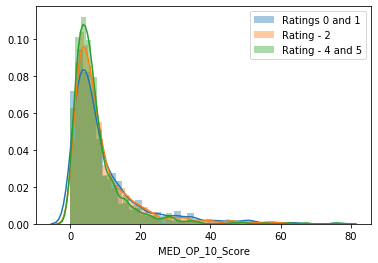

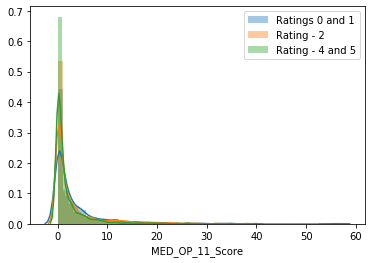

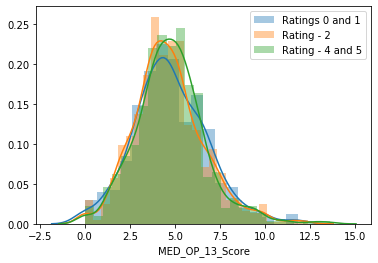

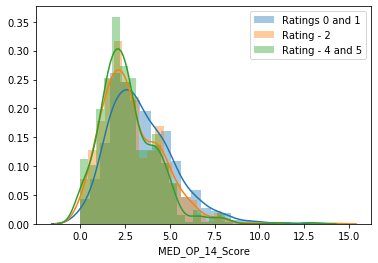

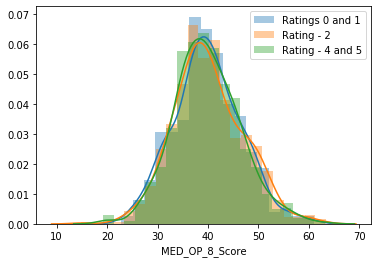

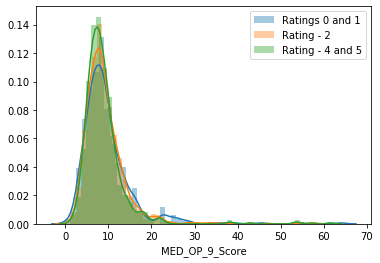

In [64]:
#plot_distributions(df_med)
plot_group_distributions(df_med, Acute_care_Hospital_data)

### Imaging efficieny measures don't impact rating much

In [65]:
df_med = -1*df_med

### Safety of care

In [66]:
df_safety = pd.read_csv("Complications - Hospital.csv", encoding="latin-1")
df_safety.head(5)

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name  \
0  Rate of complications for hip/knee replacement...   
1                  Serious blood clots after surgery   
2               Blood stream infection after surgery   
3  A wound that splits open  after surgery on the...   
4   Accidental cuts and tears from medical treatment   

                  Measure ID                 Compared to National Denominator  \
0              COMP_HIP_KNEE  No Different than the National Rate         331   
1  PSI_12_POSTOP_PULMEMB_DVT  No Different than the National Rate        4549   
2         PSI_13_POST_SEPSIS  No Different than the National Rate         578   
3        PSI_14_POSTOP_DEHIS  No Different than the National Rate         445   
4             PSI_15_ACC_LAC  No Different than the National Rate       16429   

  Score Lower Estimate Higher Estimate Footnote Measure Start Date  \
0   3.8            2.6             5.5      NaN         04/01/2012   
1  3.32           1.25            5.38      NaN         07/01/2013   
2  5.72           0.00           11.48      NaN         07/01/2013   
3  2.72           0.65            4.79      NaN         07/01/2013   
4  1.35           0.76            1.95      NaN         07/01/2013   

  Measure End Date  
0       03/31/2015  
1       06/30/2015  
2       06/30/2015  
3       06/30/2015  
4       06/30/2015

In [67]:
print("No. of unique measures", df_safety["Measure ID"].nunique())
df_safety["Measure Name"].unique()

No. of unique measures 11


array(['Rate of complications for hip/knee replacement patients',
       'Serious blood clots after surgery',
       'Blood stream infection after surgery',
       'A wound that splits open  after surgery on the abdomen or pelvis',
       'Accidental cuts and tears from medical treatment',
       'Pressure sores',
       'Deaths among Patients with Serious Treatable Complications after Surgery',
       'Collapsed lung due to medical treatment',
       'Infections from a large venous catheter',
       'Broken hip from a fall after surgery', 'Serious complications'],
      dtype=object)

In [68]:
df_safety = pivot_data(df_safety, measure_col="Measure ID", score_col="Score")
df_safety = df_safety.astype(float)
df_safety.columns = df_safety.columns.map("SAFETY_{0}".format)
df_safety.head()

SAFETY_COMP_HIP_KNEE_Score  \
Provider ID                               
10001                               3.8   
10005                               3.0   
10006                               3.8   
10007                               NaN   
10008                               NaN   

             SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score  \
Provider ID                                           
10001                                          3.32   
10005                                          5.63   
10006                                          3.85   
10007                                          4.57   
10008                                           NaN   

             SAFETY_PSI_13_POST_SEPSIS_Score  \
Provider ID                                    
10001                                   5.72   
10005                                   9.18   
10006                                    NaN   
10007                                   9.89   
10008                                    NaN   

             SAFETY_PSI_14_POSTOP_DEHIS_Score  SAFETY_PSI_15_ACC_LAC_Score  \
Provider ID                                                                  
10001                                    2.72                         1.35   
10005                                    2.11                         1.25   
10006                                    2.50                         1.93   
10007                                     NaN                         1.20   
10008                                     NaN                         1.41   

             SAFETY_PSI_3_ULCER_Score  SAFETY_PSI_4_SURG_COMP_Score  \
Provider ID                                                           
10001                            0.07                        168.26   
10005                            0.14                        179.05   
10006                            0.09                        198.33   
10007                            0.35                           NaN   
10008                            0.45                           NaN   

             SAFETY_PSI_6_IAT_PTX_Score  SAFETY_PSI_7_CVCBI_Score  \
Provider ID                                                         
10001                              0.36                      0.12   
10005                              0.47                      0.11   
10006                              0.41                      0.24   
10007                              0.40                      0.16   
10008                              0.41                      0.17   

             SAFETY_PSI_8_POST_HIP_Score  SAFETY_PSI_90_SAFETY_Score  
Provider ID                                                           
10001                               0.06                        0.68  
10005                               0.06                        0.85  
10006                               0.06                        0.91  
10007                               0.06                        0.79  
10008                                NaN                        0.90

In [69]:
df_safety.isnull().mean()

SAFETY_COMP_HIP_KNEE_Score                0.221010
SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score    0.143513
SAFETY_PSI_13_POST_SEPSIS_Score           0.337543
SAFETY_PSI_14_POSTOP_DEHIS_Score          0.270953
SAFETY_PSI_15_ACC_LAC_Score               0.081803
SAFETY_PSI_3_ULCER_Score                  0.116533
SAFETY_PSI_4_SURG_COMP_Score              0.478186
SAFETY_PSI_6_IAT_PTX_Score                0.080941
SAFETY_PSI_7_CVCBI_Score                  0.084099
SAFETY_PSI_8_POST_HIP_Score               0.177382
SAFETY_PSI_90_SAFETY_Score                0.074627
dtype: float64

In [70]:
df_safety.columns

Index(['SAFETY_COMP_HIP_KNEE_Score', 'SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score',
       'SAFETY_PSI_13_POST_SEPSIS_Score', 'SAFETY_PSI_14_POSTOP_DEHIS_Score',
       'SAFETY_PSI_15_ACC_LAC_Score', 'SAFETY_PSI_3_ULCER_Score',
       'SAFETY_PSI_4_SURG_COMP_Score', 'SAFETY_PSI_6_IAT_PTX_Score',
       'SAFETY_PSI_7_CVCBI_Score', 'SAFETY_PSI_8_POST_HIP_Score',
       'SAFETY_PSI_90_SAFETY_Score'],
      dtype='object')

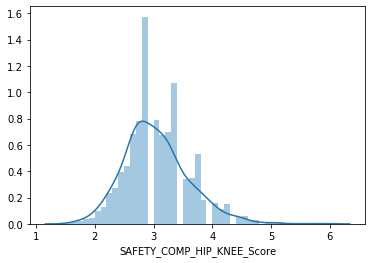

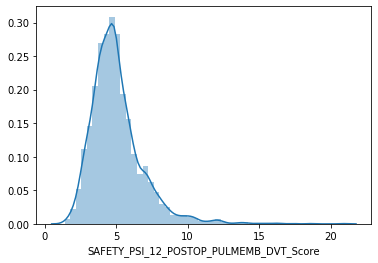

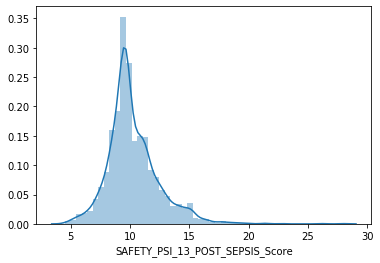

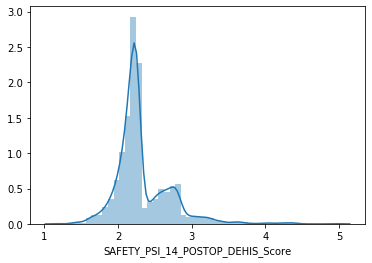

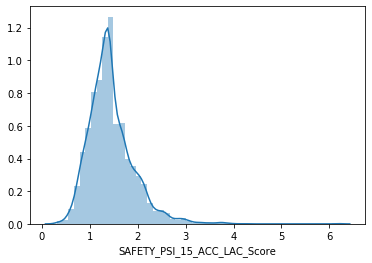

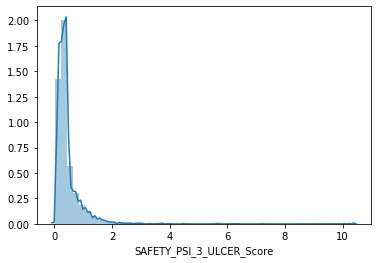

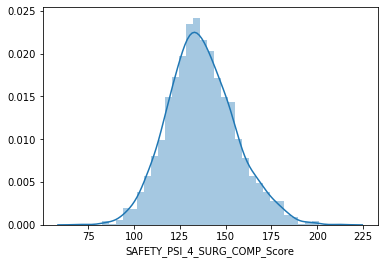

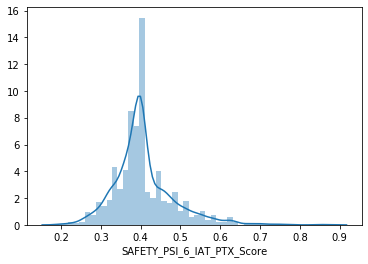

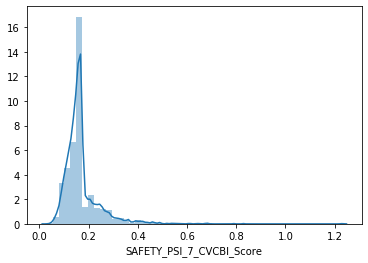

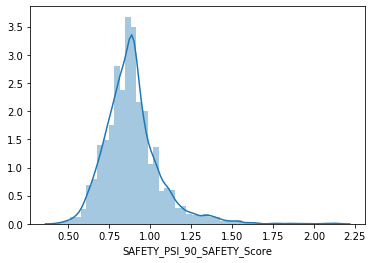

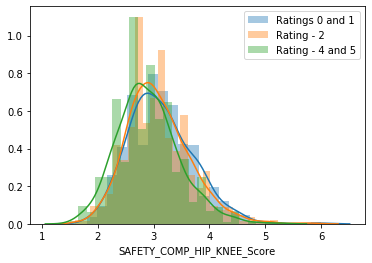

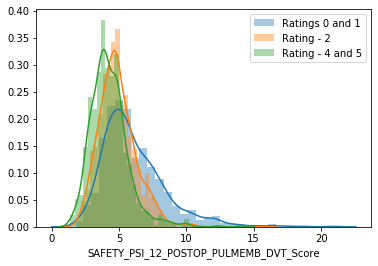

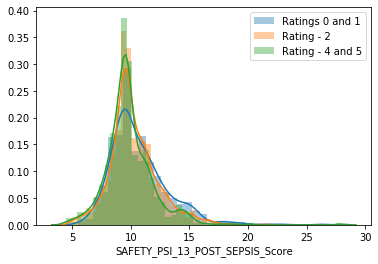

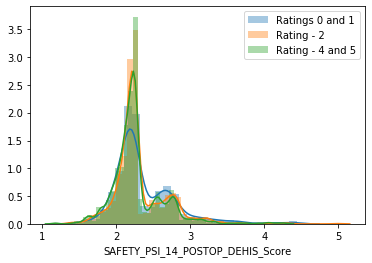

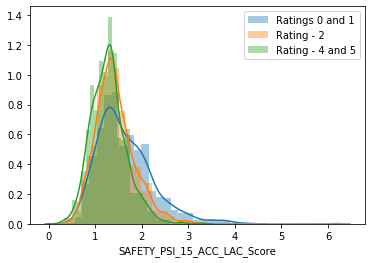

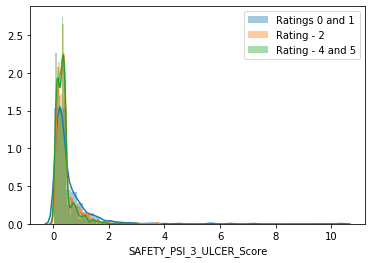

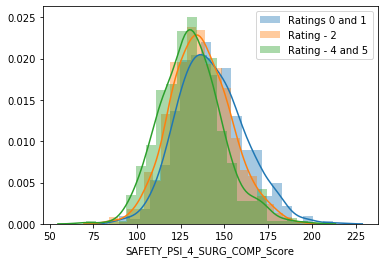

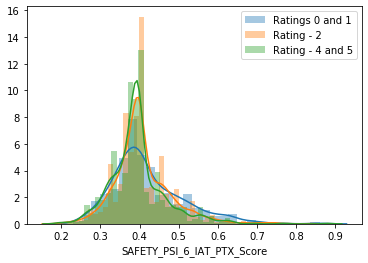

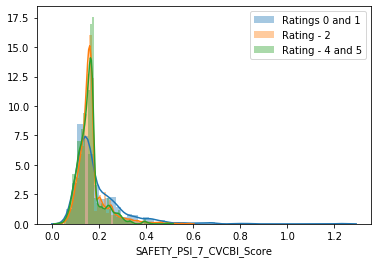

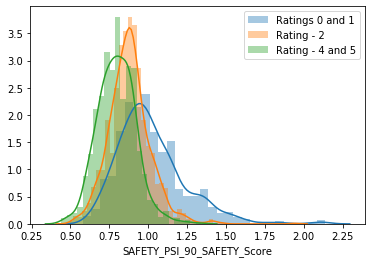

In [71]:
del df_safety["SAFETY_PSI_8_POST_HIP_Score"]
plot_distributions(df_safety)
plot_group_distributions(df_safety, Acute_care_Hospital_data)

#### PSI 90 SAFETY score strongy impacts overall rating

In [72]:
df_safety2 = pd.read_csv("Healthcare Associated Infections - Hospital.csv")
df_safety2.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Measure Name       Measure ID Compared to National  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN   
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES                  NaN   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR                  NaN   

   Score Footnote Measure Start Date Measure End Date  
0   1.03      NaN           1/1/2015       12/31/2015  
1  2.765      NaN           1/1/2015       12/31/2015  
2   7117      NaN           1/1/2015       12/31/2015  
3  9.198      NaN           1/1/2015       12/31/2015  
4     16      NaN           1/1/2015       12/31/2015

In [73]:
infection_measures = set(['Central line-associated bloodstream infections (CLABSI) in ICUs and select wards',
       'Central line-associated blood stream infections (CLABSI) in ICUs only',
       'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards',
       'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only',
       'Surgical Site Infection from colon surgery (SSI: Colon)',
       'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)',
       'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)',
       'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)'])
df_safety2 = df_safety2.loc[df_safety2["Measure Name"].isin(infection_measures)]

In [74]:
df_safety2 = pivot_data(df_safety2, measure_col="Measure ID", score_col="Score")
df_safety2 = df_safety2.astype(float)
df_safety2.columns = df_safety2.columns.map("SAFETY_{0}".format)
df_safety2.head()

SAFETY_HAI_1_SIR_Score  SAFETY_HAI_1a_SIR_Score  \
Provider ID                                                    
10001                         1.740                    2.433   
10005                         1.062                    0.648   
10006                         0.341                    0.443   
10007                           NaN                      NaN   
10008                           NaN                      NaN   

             SAFETY_HAI_2_SIR_Score  SAFETY_HAI_2a_SIR_Score  \
Provider ID                                                    
10001                         1.427                    2.307   
10005                         0.456                    0.698   
10006                         0.641                    0.801   
10007                         0.000                      NaN   
10008                           NaN                      NaN   

             SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
Provider ID                                                   
10001                         1.870                     0.0   
10005                         0.386                     NaN   
10006                         0.310                     NaN   
10007                           NaN                     NaN   
10008                           NaN                     NaN   

             SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  
Provider ID                                                  
10001                         0.422                   0.787  
10005                         1.388                   0.405  
10006                         1.261                   0.513  
10007                           NaN                   0.000  
10008                           NaN                   0.585

In [75]:
df_safety2.isnull().mean()

SAFETY_HAI_1_SIR_Score     0.287642
SAFETY_HAI_1a_SIR_Score    0.399220
SAFETY_HAI_2_SIR_Score     0.133473
SAFETY_HAI_2a_SIR_Score    0.320336
SAFETY_HAI_3_SIR_Score     0.387223
SAFETY_HAI_4_SIR_Score     0.743251
SAFETY_HAI_5_SIR_Score     0.451110
SAFETY_HAI_6_SIR_Score     0.018596
dtype: float64

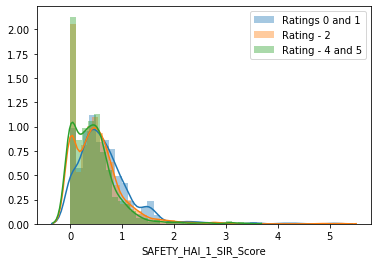

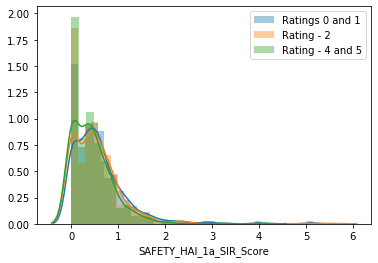

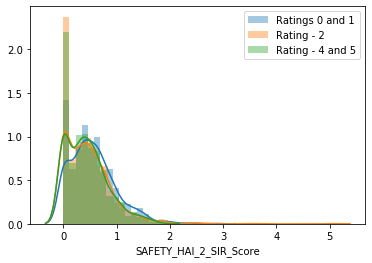

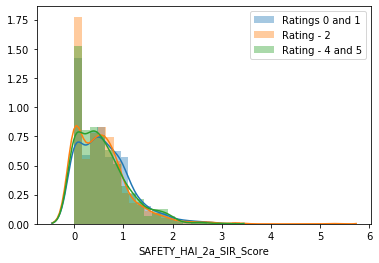

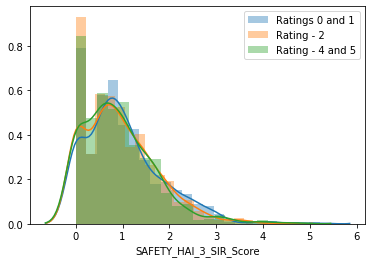

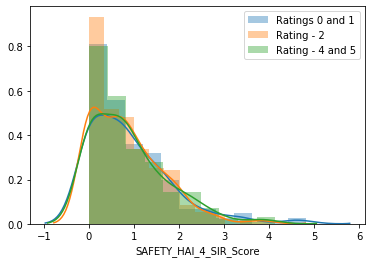

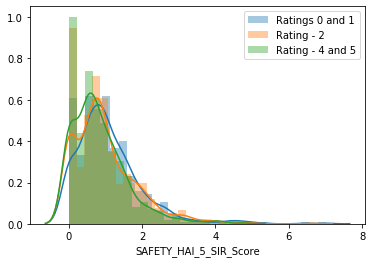

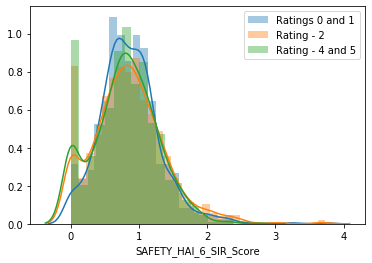

In [76]:
plot_group_distributions(df_safety2, Acute_care_Hospital_data)

In [77]:
#Merge all safety measures
df_safety = df_safety.join(df_safety2, on="Provider ID")
df_safety = -1*df_safety # invert as measures are inversely corelated with ratings

Now that we have loaded and cleaned extra data, we can merge all features.

In [78]:
df_master = df_mort.join(df_readm, on="Provider ID").\
                    join(df_time, on="Provider ID").\
                    join(df_eff, on="Provider ID").\
                    join(df_exp, on="Provider ID").\
                    join(df_safety, on="Provider ID").\
                    join(df_med, on="Provider ID")
df_master.shape

(3061, 79)

In [79]:

features = [col for col in df_master.columns if col not in ["Hospital Type",
                                                            "Hospital overall rating"]]
df_master[features].to_csv("additional_features.csv", index=False)

In [80]:
addtional_features= pd.read_csv("additional_features.csv")
addtional_features.head()

Provider ID  MORT_30_AMI_Score  MORT_30_CABG_Score  MORT_30_COPD_Score  \
0        10001              -12.5                -4.2                -9.3   
1        10005              -16.0                 NaN                -7.6   
2        10006              -16.7                -4.1                -7.1   
3        10007                NaN                 NaN                -9.3   
4        10008                NaN                 NaN                -8.2   

   MORT_30_HF_Score  MORT_30_PN_Score  MORT_30_STK_Score  rating_group  \
0             -12.4             -15.5              -15.4           1.0   
1             -15.5             -20.8              -15.5           1.0   
2             -15.6             -18.2              -17.9           0.0   
3             -14.4             -18.8              -16.6           1.0   
4             -12.7             -15.7                NaN           1.0   

   READM_30_AMI_Score  READM_30_CABG_Score  READM_30_COPD_Score  \
0               -16.5                -15.1                -21.1   
1               -16.7                  NaN                -18.0   
2               -16.1                -15.2                -19.8   
3                 NaN                  NaN                -19.9   
4                 NaN                  NaN                -19.2   

   READM_30_HF_Score  READM_30_HIP_KNEE_Score  READM_30_HOSP_WIDE_Score  \
0              -21.4                     -5.1                     -15.4   
1              -21.9                     -5.7                     -14.9   
2              -20.6                     -5.0                     -15.4   
3              -21.1                      NaN                     -16.6   
4              -23.1                      NaN                     -15.7   

   READM_30_PN_Score  READM_30_STK_Score  TIME_OP_21_Score  TIME_OP_5_Score  \
0              -18.7               -12.7             -99.0              NaN   
1              -16.4               -13.4             -60.0            -12.0   
2              -17.9               -12.0             -58.0              NaN   
3              -17.3               -12.7             -90.0             -7.0   
4              -16.0                 NaN             -49.0              NaN   

   EFF_EDV_Score  EFF_ED_1b_Score  EFF_ED_2b_Score  EFF_IMM_2_Score  \
0           -2.0           -269.0            -68.0             97.0   
1           -3.0           -243.0            -71.0             99.0   
2           -2.0           -217.0            -78.0            100.0   
3           -0.0           -219.0            -68.0             99.0   
4           -0.0           -180.0            -56.0             95.0   

   EFF_IMM_3_OP_27_FAC_ADHPCT_Score  EFF_OP_18b_Score  EFF_OP_20_Score  \
0                              81.0            -196.0            -65.0   
1                              83.0            -117.0            -27.0   
2                              87.0            -133.0            -10.0   
3                              53.0            -119.0            -38.0   
4                              43.0             -98.0            -27.0   

   EFF_OP_22_Score  EFF_OP_29_Score  EFF_OP_30_Score  EFF_OP_4_Score  \
0             -4.0              NaN             82.0             NaN   
1             -2.0             92.0             92.0            99.0   
2             -1.0             70.0             88.0             NaN   
3             -1.0              0.0              0.0            89.0   
4             -1.0             96.0             97.0             NaN   

   EFF_PC_01_Score  EFF_STK_1_Score  EFF_STK_10_Score  EFF_STK_2_Score  \
0             -0.0             99.0              96.0            100.0   
1             -1.0             98.0              99.0            100.0   
2             -0.0             99.0             100.0            100.0   
3              NaN             80.0              85.0            100.0   
4              NaN              NaN               NaN              NaN   

   EFF_STK_4_Sco

In [81]:
addtional_features.shape

(3061, 77)

In [82]:
df_master.shape

(3061, 79)

In [83]:
master_data_hospt = pd.read_csv("Hospital General Information.csv", encoding="latin-1")
master_data_hospt = master_data_hospt.loc[master_data_hospt["Hospital overall rating"] != "Not Available"]
master_data_hospt = master_data_hospt.loc[master_data_hospt["Hospital Type"] == "Acute Care Hospitals"]
master_data_hospt["Hospital overall rating"] = master_data_hospt["Hospital overall rating"].astype(int)
master_data_hospt.head()


Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs  Hospital overall rating  \
0                                         Y                        3   
1                                         Y                        3   
2                                         Y                        2   
3                                         Y                        3   
4                                         Y                        3   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN  Same as the National average   
1                              NaN    Below the National average   
2                              NaN    Below the National average   
3                              NaN  Same as the National average   
4                              NaN  Same as the National average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the National average   
1                                    NaN       Same as the National average   
2                                    NaN       Same as the National average   
3                                    NaN       Same as the National average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1      Above the National average                                      NaN   
2    Same as the National average                                      NaN   
3      Below the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                   

In [84]:
final_data = pd.merge(master_data_hospt, addtional_features, on="Provider ID", how="left")
print(final_data.shape)
final_data.head()

(3061, 104)


Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs  Hospital overall rating  \
0                                         Y                        3   
1                                         Y                        3   
2                                         Y                        2   
3                                         Y                        3   
4                                         Y                        3   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN  Same as the National average   
1                              NaN    Below the National average   
2                              NaN    Below the National average   
3                              NaN  Same as the National average   
4                              NaN  Same as the National average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the National average   
1                                    NaN       Same as the National average   
2                                    NaN       Same as the National average   
3                                    NaN       Same as the National average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1      Above the National average                                      NaN   
2    Same as the National average                                      NaN   
3      Below the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1           Same as the National average   
2             Below the National average   
3           Same as the National average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                   

(80.0, 0.0)

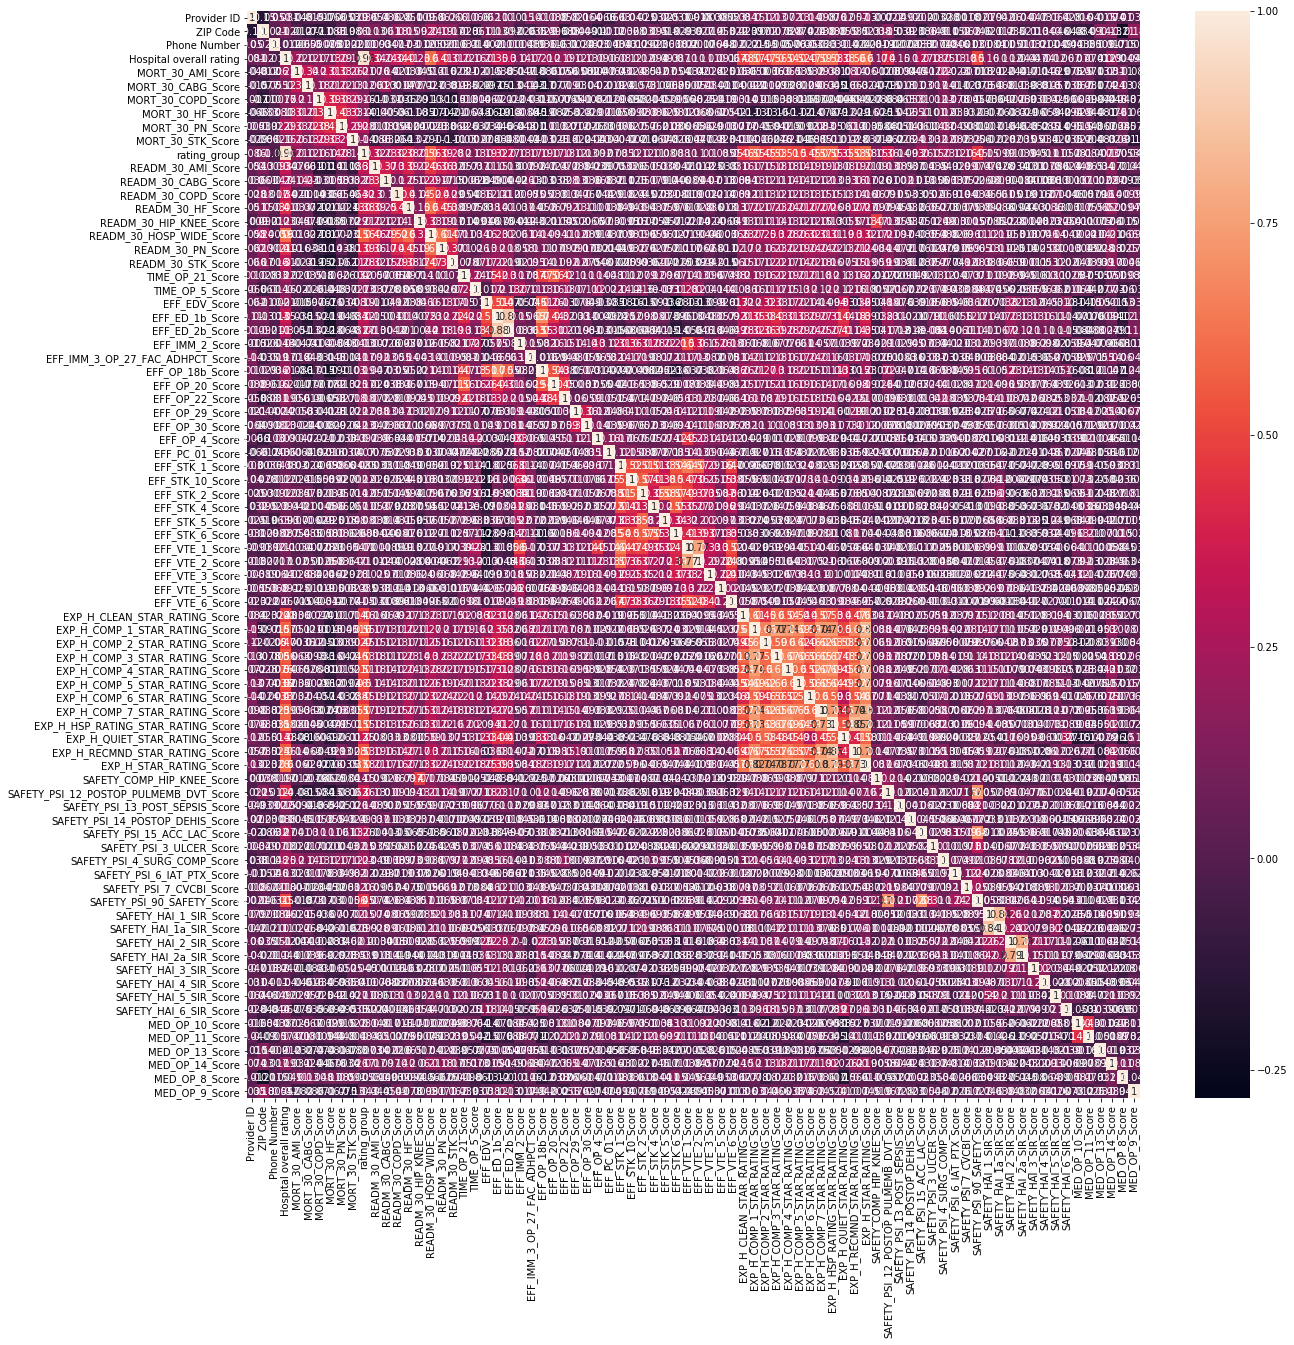

In [85]:
plt.figure(figsize = (20,20))        
ax = sns.heatmap(final_data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [86]:
#Let's check all the columns once again
all_cols = list(final_data.columns)
len(all_cols), all_cols

(104,
 ['Provider ID',
  'Hospital Name',
  'Address',
  'City',
  'State',
  'ZIP Code',
  'County Name',
  'Phone Number',
  'Hospital Type',
  'Hospital Ownership',
  'Emergency Services',
  'Meets criteria for meaningful use of EHRs',
  'Hospital overall rating',
  'Hospital overall rating footnote',
  'Mortality national comparison',
  'Mortality national comparison footnote',
  'Safety of care national comparison',
  'Safety of care national comparison footnote',
  'Readmission national comparison',
  'Readmission national comparison footnote',
  'Patient experience national comparison',
  'Patient experience national comparison footnote',
  'Effectiveness of care national comparison',
  'Effectiveness of care national comparison footnote',
  'Timeliness of care national comparison',
  'Timeliness of care national comparison footnote',
  'Efficient use of medical imaging national comparison',
  'Efficient use of medical imaging national comparison footnote',
  'MORT_30_AMI_Score'

### Modelling

We'll be starting with the supervised learning techniques. First we'll be building a linear regression model and then proceed to do a random forest model. Before that let's settle on the validation strategy.

## 1. Linear Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [88]:
#Let's create a function for creating the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [89]:
#Let's store them here in features list
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [90]:

df_train, df_test = train_test_split(final_data, train_size = 0.8, test_size = 0.2,stratify=final_data["Hospital overall rating"], random_state = 100,shuffle=True)

In [91]:
print(df_train.shape, df_test.shape)

(2448, 104) (613, 104)


In [92]:
#Let's create a simple rating mapping
rating_map = {
    'Above the National average': 2, 'Below the National average': 0,
        'Not Available': np.nan, 'Same as the National average':1
}
for feat in features:
    df_train[feat] = df_train[feat].map(rating_map)
    df_test[feat] = df_test[feat].map(rating_map)

C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df_train[features].isnull().sum()

Mortality national comparison                           143
Safety of care national comparison                      164
Readmission national comparison                          87
Patient experience national comparison                   79
Effectiveness of care national comparison                 0
Timeliness of care national comparison                  120
Efficient use of medical imaging national comparison    436
dtype: int64

There are quite a few missing values. Let's impute them using the mean

In [94]:
mean_values= df_train[features].mean()
df_train[features] = df_train[features].fillna(mean_values)
df_test[features] = df_test[features].fillna(mean_values)

C:\Users\Anindita\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [95]:
X_train = df_train[features]
X_valid = df_test[features]

y_train = df_train["Hospital overall rating"] - 1
y_test = df_test["Hospital overall rating"] - 1

In [96]:
y_train.value_counts()

2    1140
3     599
1     527
0      94
4      88
Name: Hospital overall rating, dtype: int64

In [97]:
#Let's build our model and check its accuracy
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

Training accuracy 0.6887254901960784


Validation accuracy 0.6786296900489397
Confusion matrix, without normalization
[[  5  18   0   0   0]
 [  2  95  35   0   0]
 [  0  28 218  40   0]
 [  0   0  51  97   2]
 [  0   0   5  16   1]]


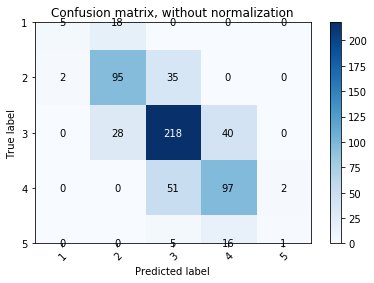

In [98]:
valid_preds = model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_test, valid_preds))

plot_confusion_matrix(y_test, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

We're getting ~68% training accuracy and validation accuracy. Let's add some more features and check our model

In [99]:

#Add more features
score_features = [col for col in final_data.columns if "Score" in col]
print(len(score_features))

75


We can use QuantileTransformer (Rank Gauusian transformer) from sklearn for achieving this.

In [100]:
from sklearn.preprocessing import QuantileTransformer
normalize = QuantileTransformer(output_distribution="normal")
df_train[score_features] = normalize.fit_transform(df_train[score_features])
df_test[score_features] = normalize.transform(df_test[score_features])

C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anindita\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [101]:
score_features_mean = df_train[score_features].mean()
df_train[score_features] = df_train[score_features].fillna(score_features_mean)
df_test[score_features] = df_test[score_features].fillna(score_features_mean)

C:\Users\Anindita\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Training accuracy 0.9064542483660131
Validation accuracy 0.9021207177814029
Confusion matrix, without normalization
[[ 20   3   0   0   0]
 [  2 116  14   0   0]
 [  0   9 271   6   0]
 [  0   0  21 128   1]
 [  0   0   0   4  18]]


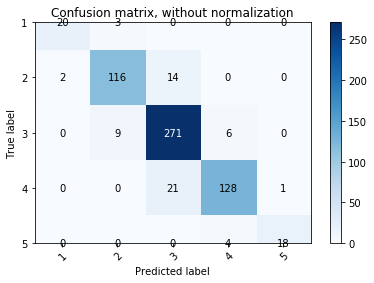

In [102]:
X_train = df_train[features+score_features]
X_valid = df_test[features+score_features]

model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_test, valid_preds))

plot_confusion_matrix(y_test, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

Now we're getting very good training and validation accuracy (~90%). We can use this model to make predictions and since this is a linear model, it is simple to interpret as well

### 2. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [154]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
y_pred = lm.predict(X_valid)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 11  12   0   0   0]
 [  2  75  55   0   0]
 [  0  22 249  15   0]
 [  0   0  47 103   0]
 [  0   0   0   6  16]]


In [159]:
print('Accuracy of logistic regression OVR on test set: {:.2f}'.format(lm.score(X_valid, y_test)))

Accuracy of logistic regression OVR on test set: 0.74


In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.48      0.61        23
           1       0.69      0.57      0.62       132
           2       0.71      0.87      0.78       286
           3       0.83      0.69      0.75       150
           4       1.00      0.73      0.84        22

    accuracy                           0.74       613
   macro avg       0.81      0.67      0.72       613
weighted avg       0.75      0.74      0.74       613



### 3. Random Forest Model

Random forest regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf_model = RandomForestRegressor(n_estimators=500,
                              min_samples_leaf=4,
                              max_features=0.33,
                              n_jobs=-1,
                              random_state=100)

In [106]:

rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.33, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

Training accuracy 0.9681372549019608
Validation accuracy 0.799347471451876
Confusion matrix, without normalization
[[  9  14   0   0   0]
 [  1  99  32   0   0]
 [  0  11 264  11   0]
 [  0   0  42 108   0]
 [  0   0   1  11  10]]


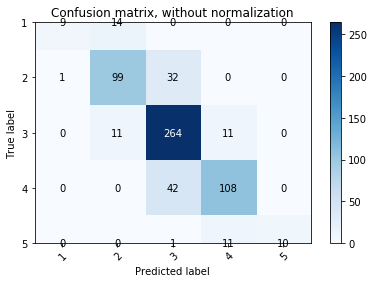

In [107]:

train_preds = rf_model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = rf_model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_test, valid_preds))

plot_confusion_matrix(y_test, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

#### Overfits

So, although random forest model achieves more training accuracy, it gives poor results on validation set. The model is overfitting a lot on training and hence poor generalization.

### 3. Unsupervised Approach - Factor Analysis and Clustering

In [108]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
 
    # standardize all scores
scaler = StandardScaler()
df_train[score_features] = scaler.fit_transform(df_train[score_features])
df_test[score_features] = scaler.fit_transform(df_test[score_features])
    
    

C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anindita\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [109]:
#First we'll perform Factor Analysis on the data

fa = FactorAnalysis(1)

mortality_train = df_train.filter(regex="^MORT_*").fillna('median')
mortality_valid = df_test.filter(regex="^MORT_*").fillna('median')

mort_fa_train = fa.fit_transform(mortality_train)
mort_fa_valid = fa.transform(mortality_valid)

Loading for MORT_30_AMI_Score is 0.5425704663359869
Loading for MORT_30_CABG_Score is 0.2856764213023785
Loading for MORT_30_COPD_Score is 0.6701439560646899
Loading for MORT_30_HF_Score is 0.7951922090308716
Loading for MORT_30_PN_Score is 0.7427766826031266
Loading for MORT_30_STK_Score is 0.554383650255152


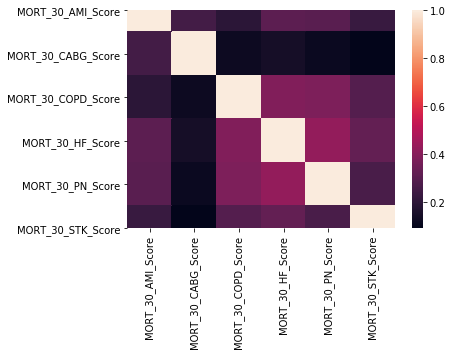

In [110]:
for col in mortality_train.columns:
    print("Loading for {} is {}".format(col, np.corrcoef(mortality_train[col].values, mort_fa_train[:, 0])[0, 1]))
    
sns.heatmap(mortality_train.corr())

In [111]:
from scipy.stats import spearmanr
spearmanr(mort_fa_train.flatten(), df_train["Mortality national comparison"])

SpearmanrResult(correlation=0.6758211446429241, pvalue=0.0)

It can observed that features which are highly correlated (HF_Score and PN_Score) have higher loading. These loadings will become our weights using which we'll be evaluating the group scores for each hospital

Similarly, we can get latent factor for all groups

In [112]:
#Let's create a function to find the latent factors
def get_latent_factor(train, valid, like=""):

    grp_train = X_train.filter(regex=like).fillna('median')
    grp_valid = X_valid.filter(regex=like).fillna('median')

    grp_fa_train = fa.fit_transform(grp_train)
    grp_fa_valid = fa.transform(grp_valid)
    
    for col in grp_train.columns:
        print("Loading for {} is {}".format(col,
                                            np.corrcoef(grp_train[col].values,
                                                        grp_fa_train[:, 0])[0, 1]))

    sns.heatmap(grp_train.corr())
    plt.show()
    return grp_fa_train, grp_fa_valid

Loading for READM_30_AMI_Score is -0.513088625023376
Loading for READM_30_CABG_Score is -0.221263980721981
Loading for READM_30_COPD_Score is -0.6091755088897707
Loading for READM_30_HF_Score is -0.7330241041138571
Loading for READM_30_HIP_KNEE_Score is -0.3247850292613334
Loading for READM_30_HOSP_WIDE_Score is -0.9348989099089907
Loading for READM_30_PN_Score is -0.7277339176626559
Loading for READM_30_STK_Score is -0.5422601640279889


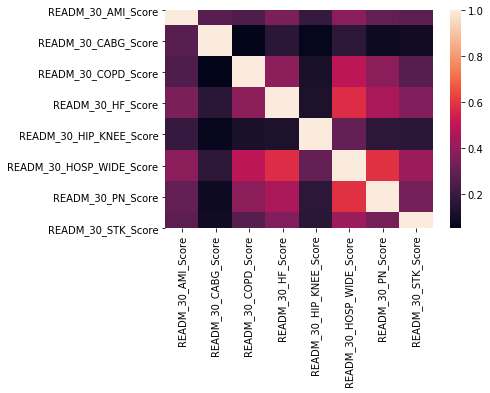

In [113]:
#Measure loadings for Readmissions
readm_fa_train, readm_fa_valid = get_latent_factor(X_train, X_valid, like="^READM_*")

In [114]:
readm_fa_train = -1* readm_fa_train
readm_fa_valid = -1* readm_fa_valid

In [115]:
spearmanr(readm_fa_train.flatten(), df_train["Readmission national comparison"])

SpearmanrResult(correlation=0.8442078548385809, pvalue=0.0)

Loading for TIME_OP_21_Score is 0.772108996406566
Loading for TIME_OP_5_Score is 0.760020496063814


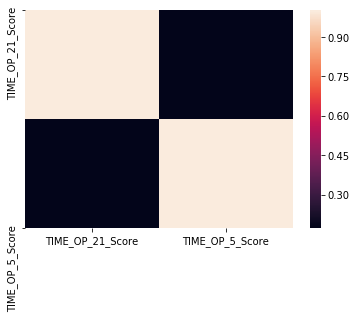

In [116]:
time_fa_train, time_fa_valid = get_latent_factor(X_train, X_valid, like="^TIME_")

Loading for EXP_H_CLEAN_STAR_RATING_Score is 0.6401145533186979
Loading for EXP_H_COMP_1_STAR_RATING_Score is 0.817543995887912
Loading for EXP_H_COMP_2_STAR_RATING_Score is 0.7021485145698253
Loading for EXP_H_COMP_3_STAR_RATING_Score is 0.8287726848528051
Loading for EXP_H_COMP_4_STAR_RATING_Score is 0.7967919523293584
Loading for EXP_H_COMP_5_STAR_RATING_Score is 0.8156007436427587
Loading for EXP_H_COMP_6_STAR_RATING_Score is 0.6769095218981119
Loading for EXP_H_COMP_7_STAR_RATING_Score is 0.7785562281394057
Loading for EXP_H_HSP_RATING_STAR_RATING_Score is 0.8360280045102998
Loading for EXP_H_QUIET_STAR_RATING_Score is 0.5750196949530834
Loading for EXP_H_RECMND_STAR_RATING_Score is 0.7801141591423721
Loading for EXP_H_STAR_RATING_Score is 0.9583532647511961


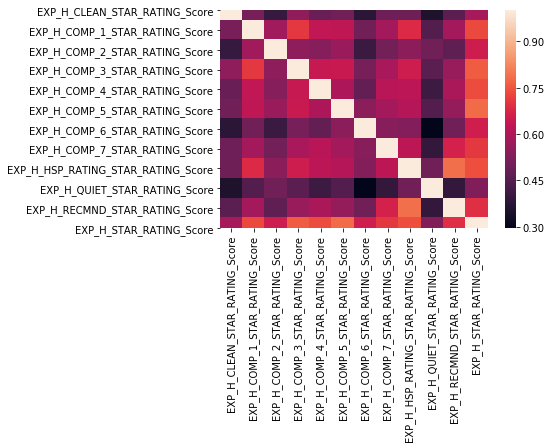

In [117]:
exp_fa_train, exp_fa_valid = get_latent_factor(X_train, X_valid, like="^EXP_")

In [118]:
spearmanr(time_fa_train.flatten(), df_train["Timeliness of care national comparison"])

SpearmanrResult(correlation=0.3806379341180249, pvalue=3.10428143133982e-85)

Loading for MED_OP_10_Score is -0.3629487976686722
Loading for MED_OP_11_Score is -0.997473736485939
Loading for MED_OP_13_Score is -0.005893134464676855
Loading for MED_OP_14_Score is 0.003073051845671859
Loading for MED_OP_8_Score is -0.07065934335631248
Loading for MED_OP_9_Score is 0.007139512208559534


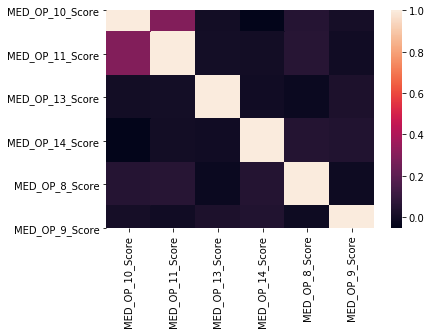

In [119]:
med_fa_train, med_fa_valid = get_latent_factor(X_train, X_valid, like="MED_OP_*")

In [120]:

med_fa_train = -1* med_fa_train
med_fa_valid = -1* med_fa_valid

In [121]:
spearmanr(med_fa_train.flatten(), df_train["Efficient use of medical imaging national comparison"])

SpearmanrResult(correlation=0.3659780219600123, pvalue=1.8378360386582315e-78)

Loading for SAFETY_COMP_HIP_KNEE_Score is -0.04891792512361508
Loading for SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score is 0.24253273120687782
Loading for SAFETY_PSI_13_POST_SEPSIS_Score is 0.05945973703915731
Loading for SAFETY_PSI_14_POSTOP_DEHIS_Score is -0.0805781322934676
Loading for SAFETY_PSI_15_ACC_LAC_Score is 0.15348216910396895
Loading for SAFETY_PSI_3_ULCER_Score is 0.07648635933734368
Loading for SAFETY_PSI_4_SURG_COMP_Score is 0.13041249013719816
Loading for SAFETY_PSI_6_IAT_PTX_Score is 0.088066436709298
Loading for SAFETY_PSI_7_CVCBI_Score is 0.061630313259469216
Loading for SAFETY_PSI_90_SAFETY_Score is 0.3243618640640199
Loading for SAFETY_HAI_1_SIR_Score is 0.7036650010942211
Loading for SAFETY_HAI_1a_SIR_Score is 0.6216779529901992
Loading for SAFETY_HAI_2_SIR_Score is 0.6893436526163633
Loading for SAFETY_HAI_2a_SIR_Score is 0.7359126184813207
Loading for SAFETY_HAI_3_SIR_Score is 0.29478522836757537
Loading for SAFETY_HAI_4_SIR_Score is 0.13187405037144398
Loading for S

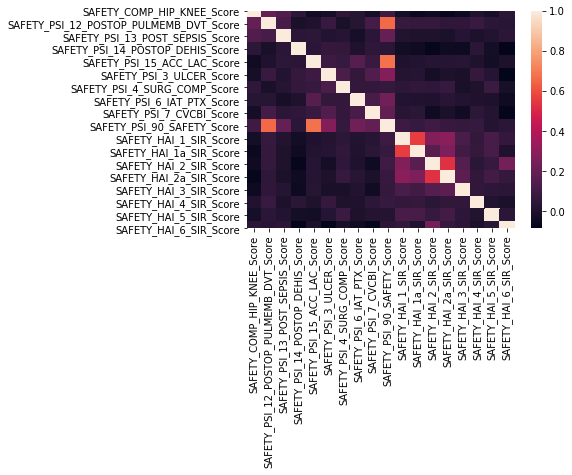

In [122]:

safety_fa_train, safety_fa_valid = get_latent_factor(X_train, X_valid, like="^SAFETY_")

In [123]:
spearmanr(safety_fa_train.flatten(), df_train["Safety of care national comparison"])

SpearmanrResult(correlation=0.2610728179868354, pvalue=1.9658200786703844e-39)

Loading for EFF_EDV_Score is -0.5710910514840576
Loading for EFF_ED_1b_Score is -0.9938091297616527
Loading for EFF_ED_2b_Score is -0.8964616725548401
Loading for EFF_IMM_2_Score is -0.1824285182255008
Loading for EFF_IMM_3_OP_27_FAC_ADHPCT_Score is -0.10147047264397839
Loading for EFF_OP_18b_Score is -0.7462899267733484
Loading for EFF_OP_20_Score is -0.4528545809180565
Loading for EFF_OP_22_Score is -0.3238962406166192
Loading for EFF_OP_29_Score is -0.04372140891555828
Loading for EFF_OP_30_Score is -0.0562924986477905
Loading for EFF_OP_4_Score is 0.02180645851927947
Loading for EFF_PC_01_Score is -0.03728711469208934
Loading for EFF_STK_1_Score is -0.1380402325769268
Loading for EFF_STK_10_Score is -0.08862605746584273
Loading for EFF_STK_2_Score is -0.07516255225602507
Loading for EFF_STK_4_Score is -0.02184058923341471
Loading for EFF_STK_5_Score is -0.1212850089547717
Loading for EFF_STK_6_Score is -0.02121763510950409
Loading for EFF_VTE_1_Score is -0.1303333418650784
Loading 

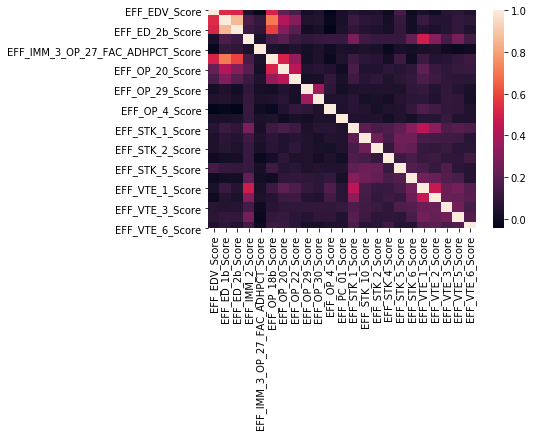

In [124]:
eff_fa_train, eff_fa_valid = get_latent_factor(X_train, X_valid, like="^EFF_")

In [125]:
eff_fa_train = -1 * eff_fa_train
eff_fa_valid = -1 * eff_fa_valid

In [126]:
spearmanr(eff_fa_train.flatten(), df_train["Effectiveness of care national comparison"])

SpearmanrResult(correlation=-0.0488818268015723, pvalue=0.015573944286476476)

In [127]:
weighted_train = mort_fa_train*0.22 + safety_fa_train*0.22 + readm_fa_train*0.22 +\
                 exp_fa_train*0.22 + eff_fa_train*0.04 + time_fa_train*0.04 + med_fa_train*0.04

weighted_test = mort_fa_valid*0.22 + safety_fa_valid*0.22 + readm_fa_valid*0.22 +\
                 exp_fa_valid*0.22 + eff_fa_valid*0.04 + time_fa_valid*0.04 + med_fa_valid*0.04

In [128]:
from sklearn.cluster import KMeans

In [129]:
kmeans = KMeans(5)
kmeans.fit(weighted_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
valid_preds = kmeans.predict(weighted_test)

In [131]:
tmp = pd.DataFrame({'y_test': y_test, 'y_preds': valid_preds})
tmp['avg_rating'] = tmp.groupby('y_preds')['y_test'].transform('mean')
tmp = tmp.sort_values(by="avg_rating").drop_duplicates(subset=["y_preds"])
tmp.head()

y_test  y_preds  avg_rating
2502       1        2    0.521739
1323       1        3    1.208955
2116       2        0    1.934426
323        4        4    2.375661
1058       3        1    3.154762

In [132]:
#Let's round off the average rating and map the predicted ratings for each cluster to the ratings classes
class_map = {4:0, 2:1, 1:2, 3:3, 0:4}

In [133]:
valid_preds_mapped = np.array([class_map[it] for it in valid_preds])
print("Validation accuracy", accuracy_score(y_test, valid_preds_mapped))

Validation accuracy 0.03099510603588907


### Provider Analysis

Next we would like to do some analysis on our model and understand some of the results. eli5 is a great library to visualize weights of the model and interpret the results.

Documentation and tutorials for the library can be found here: https://eli5.readthedocs.io/en/latest/

In [134]:
#Lets install the library if you already dont have it
!pip install eli5

In [135]:

import eli5
eli5.show_weights(model, feature_names=features+score_features)

### Observations
1. Patient experience has highest positive correlation (amongst the groups) with hospital rating.
2. Hospital wide readmissions after discharge score has highest positive correlation with rating.
3. Mortality related scores are also in top 10.

In [136]:
df_train.head()

Provider ID                      Hospital Name               Address  \
1792       330102             KENMORE MERCY HOSPITAL   2950 ELMWOOD AVENUE   
1649       300005      LAKES REGION GENERAL HOSPITAL        80 HIGHLAND ST   
2894       500041  PEACHEALTH ST JOHN MEDICAL CENTER  1615 DELAWARE STREET   
1787       330088       EASTERN LONG ISLAND HOSPITAL       201 MANOR PLACE   
2291       390138                WAYNESBORO HOSPITAL      501 EAST MAIN ST   

            City State  ZIP Code County Name  Phone Number  \
1792     KENMORE    NY     14217        ERIE    7164476100   
1649     LACONIA    NH      3246     BELKNAP    6035243211   
2894    LONGVIEW    WA     98632     COWLITZ    3604142000   
1787   GREENPORT    NY     11944     SUFFOLK    6314771000   
2291  WAYNESBORO    PA     17268    FRANKLIN    7177654000   

             Hospital Type              Hospital Ownership Emergency Services  \
1792  Acute Care Hospitals   Voluntary non-profit - Church                Yes   
1649  Acute Care Hospitals  Voluntary non-profit - Private                Yes   
2894  Acute Care Hospitals   Voluntary non-profit - Church                Yes   
1787  Acute Care Hospitals  Voluntary non-profit - Private                Yes   
2291  Acute Care Hospitals    Voluntary non-profit - Other                Yes   

     Meets criteria for meaningful use of EHRs  Hospital overall rating  \
1792                                         Y                        3   
1649                                       NaN                        3   
2894                                         Y                        3   
1787                                         Y                        3   
2291                                         Y                        4   

     Hospital overall rating footnote  Mortality national comparison  \
1792                              NaN                            1.0   
1649                              NaN                            1.0   
2894                              NaN                            1.0   
1787                              NaN                            1.0   
2291                              NaN                            1.0   

     Mortality national comparison footnote  \
1792                                    NaN   
1649                                    NaN   
2894                                    NaN   
1787                                    NaN   
2291                                    NaN   

      Safety of care national comparison  \
1792                            1.000000   
1649                            1.000000   
2894                            1.000000   
1787                            1.049037   
2291                            1.000000   

            Safety of care national comparison footnote  \
1792                                                NaN   
1649                                                NaN   
2894                                                NaN   
1787  Results are not available for this reporting p...   
2291                                                NaN   

      Readmission national comparison  \
1792                              2.0   
1649                              2.0   
2894                              2.0   
1787                              1.0   
2291                              1.0   

     Readmission national comparison footnote  \
1792                                      NaN   
1649                                      NaN   
2894                                      NaN   
1787                                      NaN   
2291                                      NaN   

      Patient experience national comparison  \
1792                                     0.0   
1649                                     1.0   
2894                                     0.0   
1787                                     1.0   
2291                                     2.0   

     Patient experience national comparison footnote  \
179

##### As given in the problem statement we need to provide recommendations for the hospital with Provider ID = 140010 (EVANSTON HOSPITAL). Let's go ahead and analyze it.

In [137]:
data_evanston= df_train.loc[final_data["Provider ID"]==140010]
data_evanston

Provider ID      Hospital Name         Address      City State  ZIP Code  \
840       140010  EVANSTON HOSPITAL  2650 RIDGE AVE  EVANSTON    IL     60201   

    County Name  Phone Number         Hospital Type  \
840        COOK    8474328000  Acute Care Hospitals   

               Hospital Ownership Emergency Services  \
840  Voluntary non-profit - Other                Yes   

    Meets criteria for meaningful use of EHRs  Hospital overall rating  \
840                                         Y                        3   

    Hospital overall rating footnote  Mortality national comparison  \
840                              NaN                            2.0   

    Mortality national comparison footnote  \
840                                    NaN   

     Safety of care national comparison  \
840                                 0.0   

    Safety of care national comparison footnote  \
840                                         NaN   

     Readmission national comparison Readmission national comparison footnote  \
840                              2.0                                      NaN   

     Patient experience national comparison  \
840                                     0.0   

    Patient experience national comparison footnote  \
840                                             NaN   

     Effectiveness of care national comparison  \
840                                        2.0   

    Effectiveness of care national comparison footnote  \
840                                                NaN   

     Timeliness of care national comparison  \
840                                     1.0   

    Timeliness of care national comparison footnote  \
840                                             NaN   

     Efficient use of medical imaging national comparison  \
840                                                2.0      

    Efficient use of medical imaging national comparison footnote  \
840                                                NaN              

     MORT_30_AMI_Score  MORT_30_CABG_Score  MORT_30_COPD_Score  \
840           2.663533            2.567316            2.439926   

     MORT_30_HF_Score  MORT_30_PN_Score  MORT_30_STK_Score  rating_group  \
840          1.753882          1.668789           1.644445           1.0   

     READM_30_AMI_Score  READM_30_CABG_Score  READM_30_COPD_Score  \
840            0.508364            -1.841486             0.218893   

     READM_30_HF_Score  READM_30_HIP_KNEE_Score  READM_30_HOSP_WIDE_Score  \
840           0.504756                 1.873496                  0.424857   

     READM_30_PN_Score  READM_30_STK_Score  TIME_OP_21_Score  TIME_OP_5_Score  \
840           0.352192           -0.385476         -0.559944     1.055176e-16   

     EFF_EDV_Score  EFF_ED_1b_Score  EFF_ED_2b_Score  EFF_IMM_2_Score  \
840      -1.543946          0.35467         0.408987        -0.249567   

     EFF_IMM_3_OP_27_FAC_ADHPCT_Score  ...  EFF_OP_30_Score  EFF_OP_4_Score  \
840                         -1.657627  ...        -0.213532    1.746622e-15   

     EFF_PC_01_Score  EFF_STK_1_Score  EFF_STK_10_Score  EFF_STK_2_Score  \
840         1.251561        -0.681773          1.371015         0.908255   

     EFF_STK_4_Score  EFF_STK_5_Score  EFF_STK_6_Score  EFF_VTE_1_Score  \
840        -0.750181        -1.118244         1.637064        -0.126614   

     EFF_VTE_2_Score  EFF_VTE_3_Score  EFF_VTE_5_Score  EFF_VTE_6_Score  \
840          1.39936        -0.223992        -0.910811        -2.293338   

     EXP_H_CLEAN_STAR_RATING_Score  EXP_H_COMP_1_STAR_RATING_Score  \
840                       0.276304                       -0.394128   

     EXP_H_COMP_2_STAR_RATING_Score  EXP_H_COMP_3_STAR_RATING_Score  \
840                       -0.129536                       -0.130709   

     EXP_H_COMP_4_STAR_RATING_Score  EXP_H_COMP_5_STAR_RATING_Score  \
840                       -0.026304                       -0.762789   

     EXP_H_COMP_6_STAR_RATING_Score  EXP_H_COMP_7_STAR_RA

In [138]:
rating_prediction = model.predict(data_evanston[features+score_features])[0]
print("Predicted and actual ratings are ", rating_prediction, data_evanston["Hospital overall rating"].values[0])

Predicted and actual ratings are  2.332717368813154 3


So apparently, Evanston hospital has an average rating prediction. Our predicted rating is not very far from actual rating.Lets find out which factors are contributing to their low rating

In [139]:
eli5.explain_prediction(model, data_evanston[features+score_features], feature_names=features+score_features)

Explanation(estimator='LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)', description=None, error=None, method='linear model', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.5243889146651994, std=None, value=1.0), FeatureWeight(feature='Mortality national comparison', weight=0.19682181149880318, std=None, value=2.0), FeatureWeight(feature='MORT_30_PN_Score', weight=0.1873501229425162, std=None, value=1.6687891085768467), FeatureWeight(feature='MORT_30_HF_Score', weight=0.18647655929753693, std=None, value=1.7538823469978477), FeatureWeight(feature='MORT_30_COPD_Score', weight=0.16872766386950563, std=None, value=2.439926062449895), FeatureWeight(feature='READM_30_HOSP_WIDE_Score', weight=0.13081895554947998, std=None, value=0.4248571945521493), FeatureWeight(feature='Effectiveness of care national comparison', weight=0.120845970925612, std=None, value=2.0), FeatureWeight(feature='MORT_30_AMI_Score', weight=0.1103229091534937, std=None, value=2.6635333335846325), FeatureWeight(feature='Efficient use of medical imaging national comparison', weight=0.09564965257708727, std=None, value=2.0), FeatureWeight(feature='Readmission national comparison', weight=0.09210177036886386, std=None, value=2.0), FeatureWeight(feature='MORT_30_STK_Score', weight=0.07233711656209932, std=None, value=1.644444515595565), FeatureWeight(feature='SAFETY_PSI_3_ULCER_Score', weight=0.04622236852770787, std=None, value=5.155724128697032), FeatureWeight(feature='SAFETY_PSI_4_SURG_COMP_Score', weight=0.027420089264476873, std=None, value=3.9221185171249027), FeatureWeight(feature='EFF_ED_1b_Score', weight=0.019709597821110092, std=None, value=0.35467011591074526), FeatureWeight(feature='MORT_30_CABG_Score', weight=0.016546363885906953, std=None, value=2.5673159024900003), FeatureWeight(feature='READM_30_HIP_KNEE_Score', weight=0.016543237257882613, std=None, value=1.873495733084531), FeatureWeight(feature='SAFETY_PSI_6_IAT_PTX_Score', weight=0.01399462286608275, std=None, value=1.7335921686246973), FeatureWeight(feature='READM_30_AMI_Score', weight=0.012908319788353951, std=None, value=0.5083640289515627), FeatureWeight(feature='READM_30_HF_Score', weight=0.01241101965746745, std=None, value=0.5047560159930221), FeatureWeight(feature='EXP_H_RECMND_STAR_RATING_Score', weight=0.008892318080221331, std=None, value=0.4379967174894303), FeatureWeight(feature='EFF_PC_01_Score', weight=0.007870722801384256, std=None, value=1.2515609838223787), FeatureWeight(feature='SAFETY_PSI_14_POSTOP_DEHIS_Score', weight=0.007672193840924824, std=None, value=1.923489472933091), FeatureWeight(feature='SAFETY_PSI_13_POST_SEPSIS_Score', weight=0.007569103950353488, std=None, value=1.0062704694868783), FeatureWeight(feature='READM_30_PN_Score', weight=0.006879241383094935, std=None, value=0.3521922814644665), FeatureWeight(feature='SAFETY_PSI_15_ACC_LAC_Score', weight=0.005329952824665758, std=None, value=0.13672370881104168), FeatureWeight(feature='READM_30_CABG_Score', weight=0.005085833110638583, std=None, value=-1.8414855730017359), FeatureWeight(feature='EXP_H_HSP_RATING_STAR_RATING_Score', weight=0.004472808185639561, std=None, value=0.25994512041848217), FeatureWeight(feature='READM_30_COPD_Score', weight=0.0044065948285846685, std=None, value=0.2188927634220609), FeatureWeight(feature='EFF_STK_2_Score', weight=0.004046540174821843, std=None, value=0.9082547539086124), FeatureWeight(feature='EXP_H_CLEAN_STAR_RATING_Score', weight=0.003861092496470368, std=None, value=0.27630368910898956), FeatureWeight(feature='EFF_STK_10_Score', weight=0.0032325448201474577, std=None, value=1.3710151580941865), FeatureWeight(feature='MED_OP_14_Score', weight=0.0016935702500726648, std=None, value=0.2362892964310499), FeatureWeight(feature='EFF_VTE_2_Score', weight=0.0016432617979177785, std=None, value=1.3993597070538726), FeatureWeight(feature='EXP_H_QUIET_STAR_RATING_Scor

In [140]:
#For this hospital, let's go ahead and analyse the group scores first
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
data_evanston[features]

Mortality national comparison  Safety of care national comparison  \
840                            2.0                                 0.0   

     Readmission national comparison  Patient experience national comparison  \
840                              2.0                                     0.0   

     Effectiveness of care national comparison  \
840                                        2.0   

     Timeliness of care national comparison  \
840                                     1.0   

     Efficient use of medical imaging national comparison  
840                                                2.0

As you can see the hospital is not doing well in Safety and Patient Experience which have a very high weightage(22%) towards the ratings. So we'll focus on these ratings

### Recommendations 1:
1. For Safety, as given by the low negative correlation ELI5 score we can say that the hospital needs to improve PSI_90_SAFETY_Score, SAFETY_PSI_12_POSTOP_PULMEMB_DVT_SCORE,SAFETY_HAI_4_SIR_Score and so on.
2. Similarly, for Experience, it needs to improve its EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score and so on

In [141]:
df_mort_readm2 = pd.read_csv("Readmissions and Deaths - Hospital.csv")
features = ['Measure ID', 'Compared to National']
data_evanston2 = df_mort_readm2.loc[df_mort_readm2["Provider ID"] == 140010]
data_evanston2[features]

Measure ID                 Compared to National
15736         MORT_30_AMI        Better than the National Rate
15737        MORT_30_CABG  No Different than the National Rate
15738        MORT_30_COPD        Better than the National Rate
15739          MORT_30_HF        Better than the National Rate
15740          MORT_30_PN        Better than the National Rate
15741         MORT_30_STK        Better than the National Rate
15742        READM_30_AMI  No Different than the National Rate
15743       READM_30_CABG  No Different than the National Rate
15744       READM_30_COPD  No Different than the National Rate
15745         READM_30_HF  No Different than the National Rate
15746   READM_30_HIP_KNEE        Better than the National Rate
15747  READM_30_HOSP_WIDE  No Different than the National Rate
15748         READM_30_PN  No Different than the National Rate
15749        READM_30_STK  No Different than the National Rate

### Recommendations 2:
1. Most Mortality measures are better than national rate and also the only average one MORT_30_CABG doesn't have a high ELI5 score. Therefore no need to recommend any changes here.
2. For Readmission however, most of the measure scores are average only and from the ELI5 score, we can clearly see that READM_30_HOSP_WIDE_Score and Readmission national comparison have a high values. Therefore, in order to improve their ratings they need to focus on all the average measures - READM_30_HOSP_WIDE,READM_30_HF,etc. which'll indirectly improve the group average scores.
